#### Liste des tâches à réaliser sur ce Dataset
1 - Analyse Exploratoire
   * Identification de la target
   * Nombre de Lignes et de colonne
   * Identification des valeurs manquantes
   * Type de Variable contenu dans le dataset
   * Visualisation de la cible
   * Compréhension des différentes variables
   * Visualisation des rélations feature/target
   * Identification des Outliers

<strong> Objectif du projet<strong><br/> Le défi de ce projet est de prédire avec précision le futur cours de clôture ajusté de l'ETF sur l'or sur 
une période donnée dans le futur.

#### Importation des différentes librairies necessaire.

In [20]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()

#### Chargement du Dataset

In [4]:
data = pd.read_csv('dataset.csv', na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [5]:
data.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   

              Volume     SP_open     SP_high      SP_low    SP_close  ...  \
Date                                                                  ...   
2011-12-15  21521900  123.029999  123.199997  121.989998  122.180000  ...   
2011-12-16  18124300  122.230003  122.949997  121.300003  121.589996  ...   
2011-12-19  12547200  122.059998  122.320000  120.029999  120.290001  ...   
2011-12-20   9136300  122.180000  124.139999  120.370003  123.930000  ...   
2011-12-21  11996100  123.930000  124.360001  122.750000  124.169998  ...   

              GDX_Low  GDX_Close  GDX_Adj Close  GDX_Volume   USO_Open  \
Date                                                                     
2011-12-15  51.570000  51.680000      48.973877    20605600  36.900002   
2011-12-16  52.040001  52.680000      49.921513    16285400  36.180000   
2011-12-19  51.029999  51.169998      48.490578    15120200  36.389999   
2011-12-20  52.369999  52.990002      50.215282    11644900  37.299999   
2011-12-21  52.419998  52.959999      50.186852     8724300  37.669998   

             USO_High    USO_Low  USO_Close  USO_Adj Close  USO_Volume  
Date                                                                    
2011-12-15  36.939999  36.049999  36.130001      36.130001    12616700  
2011-12-16  36.500000  35.730000  36.270000      36.270000    12578800  
2011-12-19  36.450001  35.930000  36.200001      36.200001     7418200  
2011-12-20  37.610001  37.220001  37.560001      37.560001    10041600  
2011-12-21  38.240002  37.520000  38.110001      38.110001    10728000  

[5 rows x 80 columns]

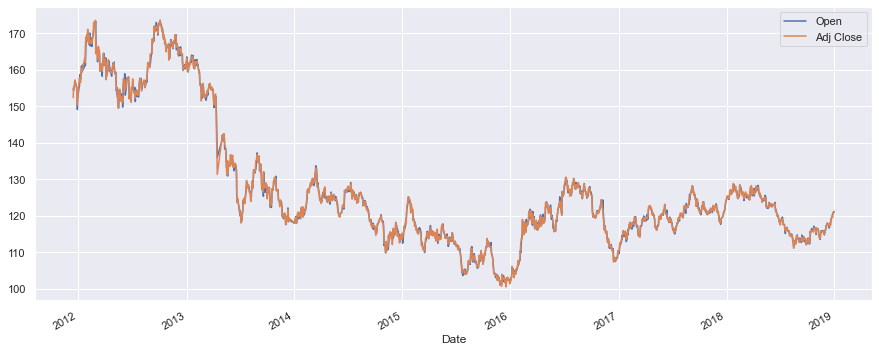

In [64]:
plt.figure(figsize=(15,6))
df['Open'].plot()
df['Adj Close'].plot()
plt.legend()
plt.show()

In [6]:
df = data.copy()

* Identification de la target

In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO

D'après le sujet, la variable cible ou target est : Adj Close.

In [8]:
df['Adj Close'].isna().sum()

0

In [9]:
df['Adj Close'].dtype

dtype('float64')

* Determination du nombre de ligne et de colonne du dataset

In [41]:
df.shape

(1718, 80)

In [10]:
nline = df.shape[0]
ncol = df.shape[1]
print(f'Le dataset contient {nline} ligne et {ncol} colonne.')

Le dataset contient 1718 ligne et 80 colonne.


* Determination des données manquantes

In [11]:
df.isnull().values.any()

False

Le dataset ne contient aucune données manquante.

* Les types de variables contenu dans le dataset

In [47]:
df.dtypes.value_counts()

float64    58
int64      22
dtype: int64

Nous avons 2 types de données dans notre dataset a savoir les entiers et les nombres flottant.

* Visualisation de la Variable cible

In [14]:
d = df.drop(['Adj Close'], axis=1)

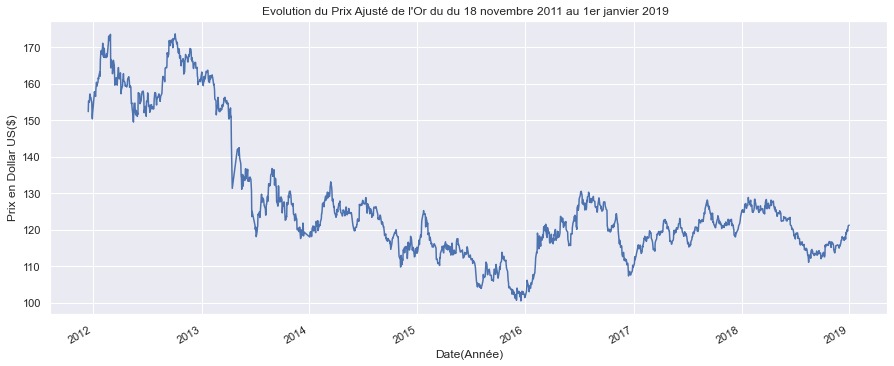

In [59]:
plt.figure(figsize=(15,6))
df['Adj Close'].plot()
plt.xlabel('Date(Année)')
plt.ylabel('Prix en Dollar US($)')
plt.title('Evolution du Prix Ajusté de l\'Or du du 18 novembre 2011 au 1er janvier 2019  ')
#plt.savefig('target.png', dpi=200)
plt.show()

* Commentaire du Graphe de la variable cible <br>
  - Nous constatons une tendance à la baisse des prix ajusté à la fermèture de l'or sur la période (novembre 2011 à janvier 2019)

* Compréhension des différentes variables

* ETF : ETF (Exchange Traded Fund ) ou FNB (fonds négocié en bourse) en français est un type de titre qui suit un indice , un secteur, une marchandise ou un autre actif, mais qui peut être acheté ou vendu en bourse de la même manière qu'une action ordinaire.<br><br>
* Date : La date du jour.<br><br>
* Open : Prix du ETF de l'or a l'ouverture du marché.<br><br>
* High : Prix du ETF de l'or le plus haut de la journée.<br><br>
* Low : Prix du ETF de l'or le plus bas de la journée.<br><br>
* Close : Prix du ETF de l'or à la Clôture  du marché.<br><br>
* Adj Close : Prix adjuté du ETF de l'or à la clôture du marché.<br><br>
* Volume : quantité de ETF de l'or disponible pour le jour.<br><br>
* Indice S&P 500 ou SP : Le S&P 500 est un indice boursier basé sur 500 grandes sociétés      cotées sur les bourses aux États-Unis (NYSE ou NASDAQ). L'indice est possédé et géré par Standard & Poor's, l'une des trois principales sociétés de notation financière.<br><br>
* Indice Dow Jones ou DJ : Le Dow Jones Industrial Average (abrégé en DJIA et souvent raccourci en Dow Jones) est le plus vieil indice des bourses de New York et le plus vieil indice boursier du monde.<br><br>
* Eldorado Gold Corporation (EGO) ou EG : Eldorado Gold Corp est un producteur d'or et de métaux de base basé au Canada avec des opérations d'extraction<br><br>
* EU : Taux de change EURO - USD<br><br>
* OF : Contrats à terme sur le pétrole brut Brent.<br><br>
* OS : Prix du Pétrole brut en USD<br><br>
* SF : Contrats à terme sur l'argent.<br><br>
* USB : Taux des obligations américaines (10 ans).<br><br>
* PLT : Prix du platine.<br><br>
* PLD_trend : Prix du palladium.<br><br>
* RHO_trend : Prix du Rhodium<br><br>
* USDI : Indice du dollar américain.<br><br>
* GDX : ETF des mineurs d'or.<br><br>
* USO : Pétrole ETF.<br><br>

* Visualisation des rélations feature/target

- Visualisation de l'évolution de la variable cibe et d'une feature au cours du temps 

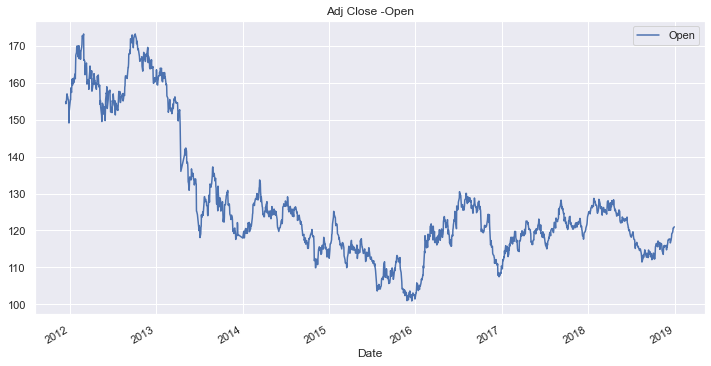

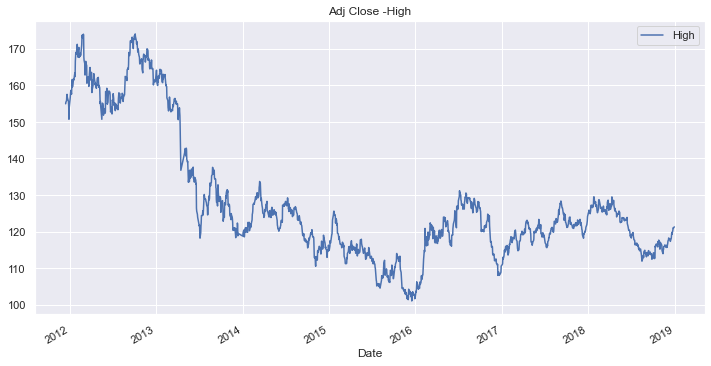

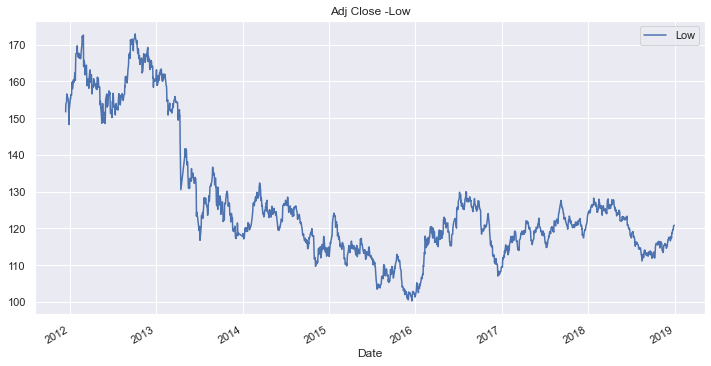

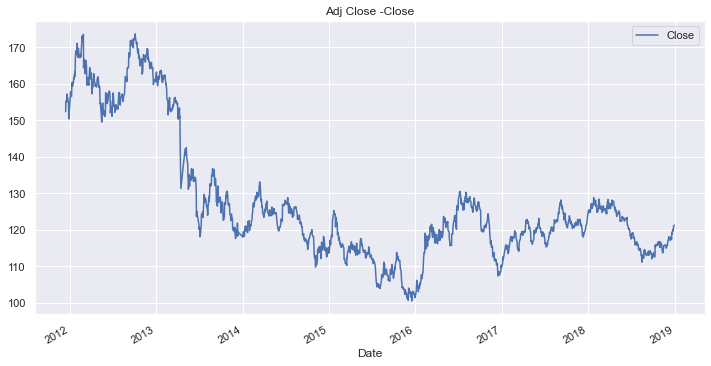

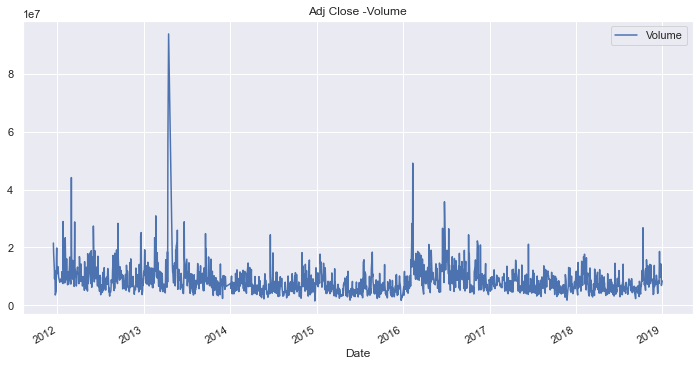

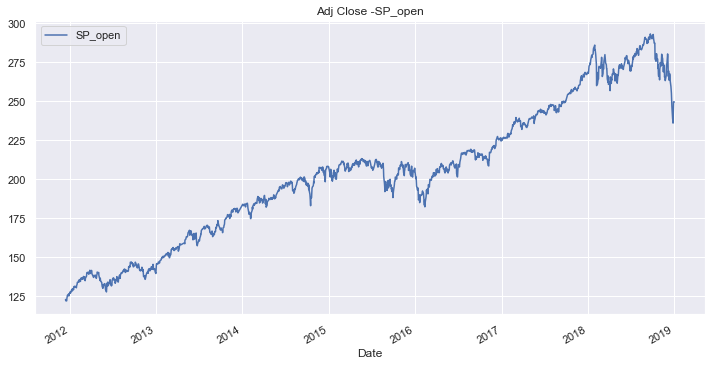

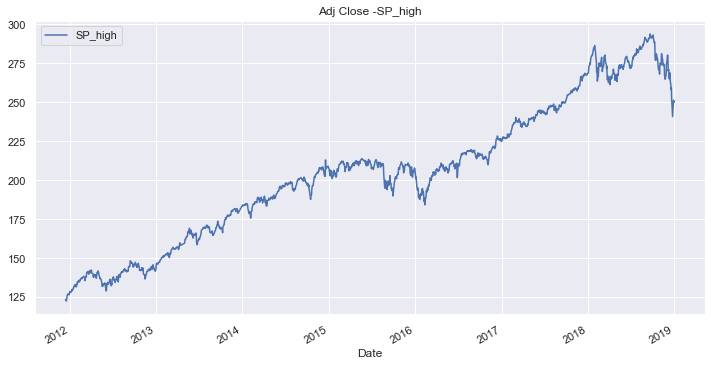

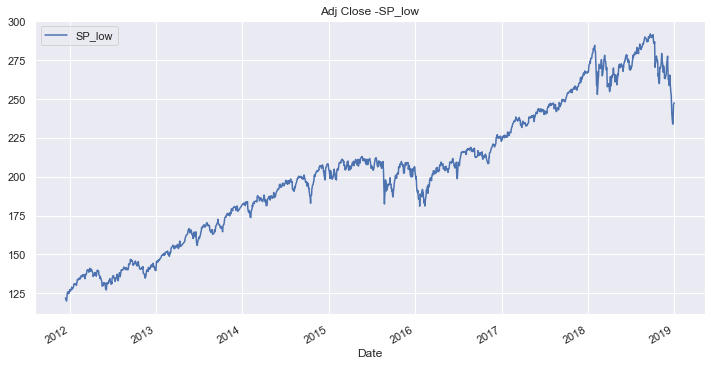

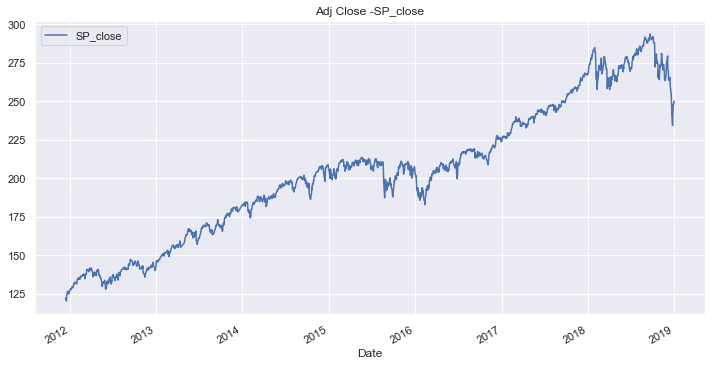

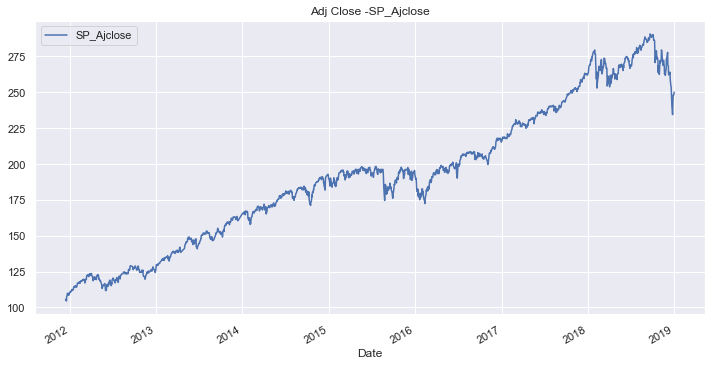

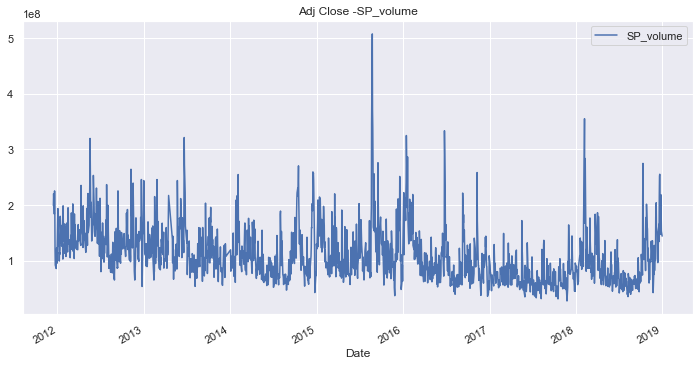

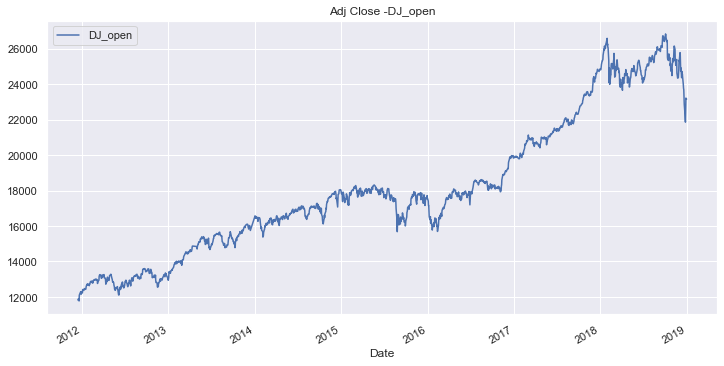

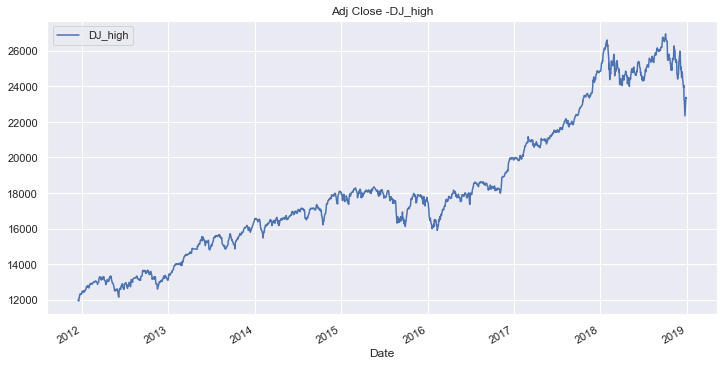

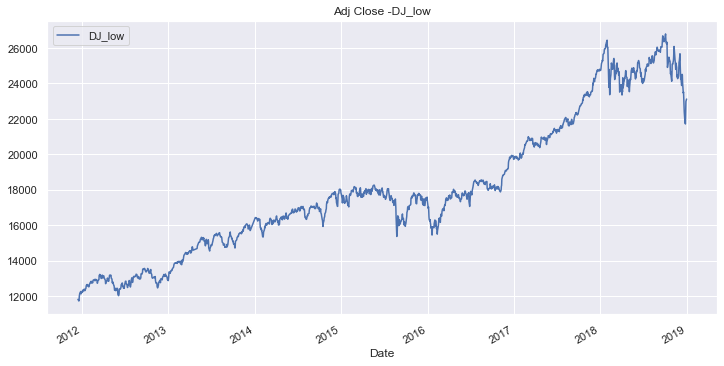

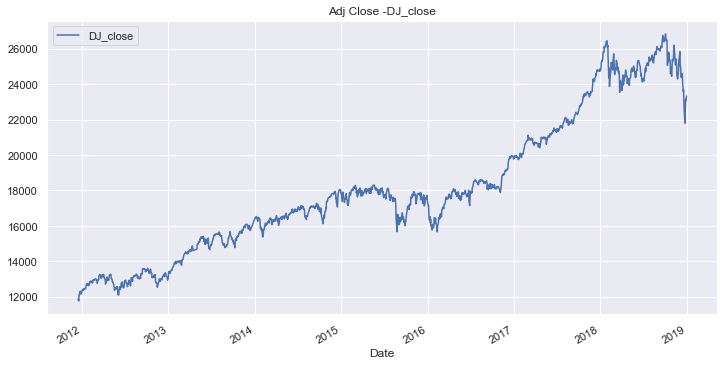

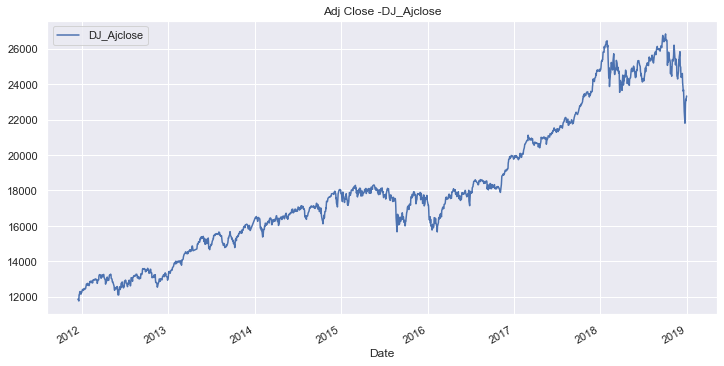

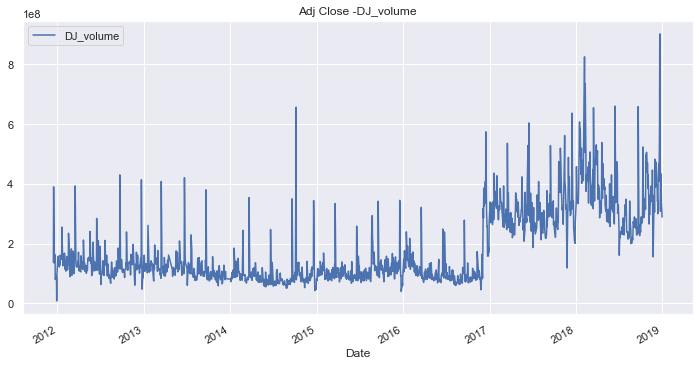

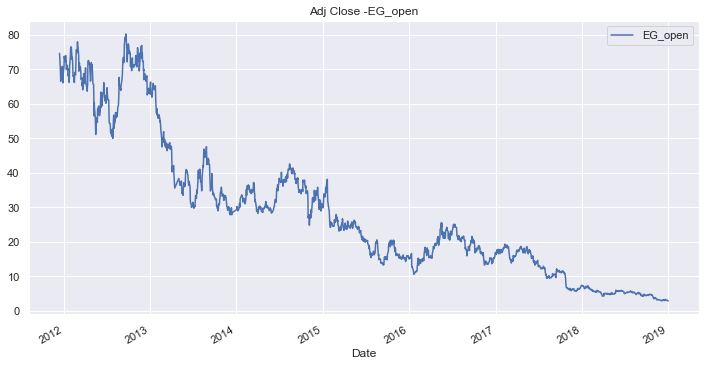

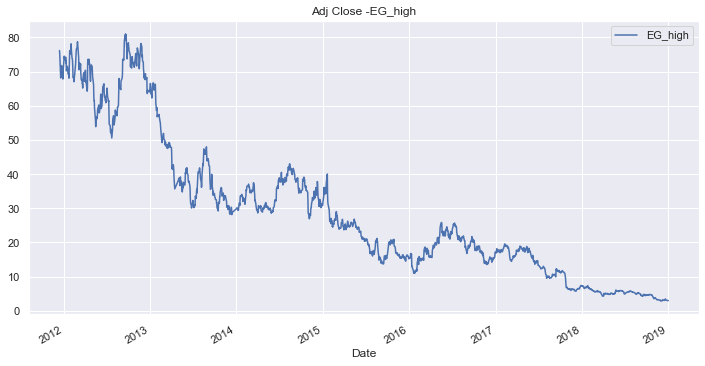

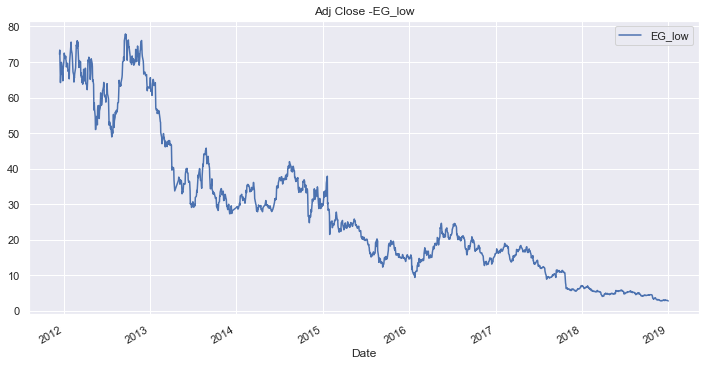

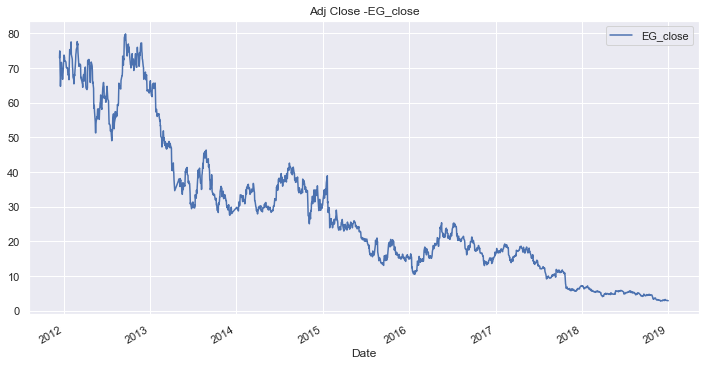

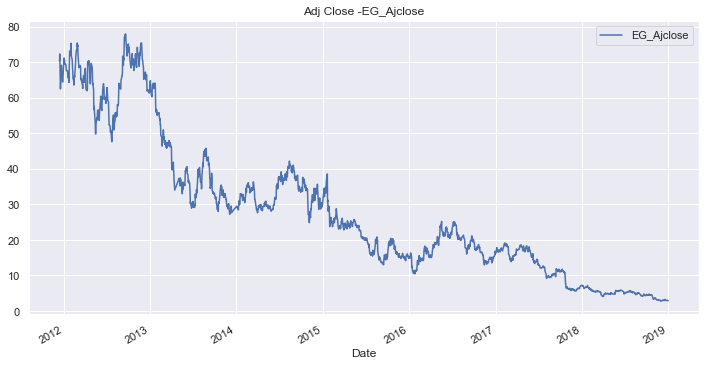

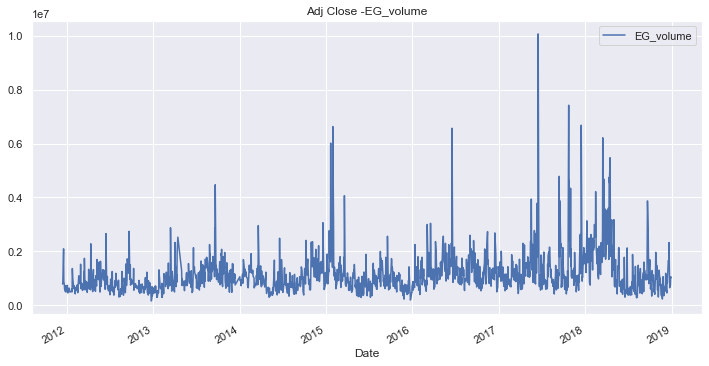

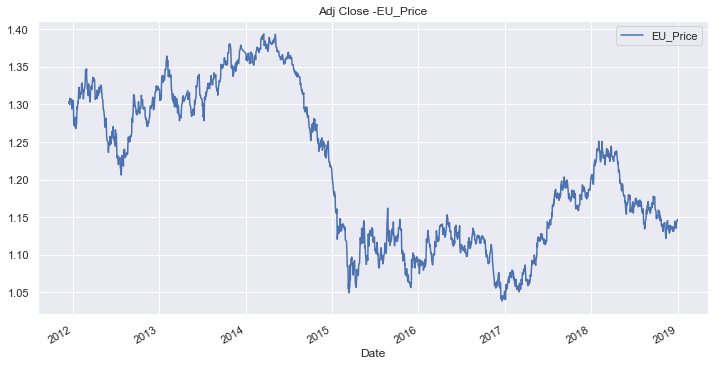

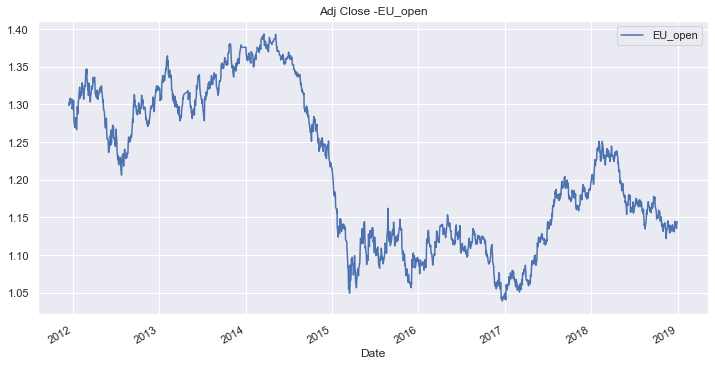

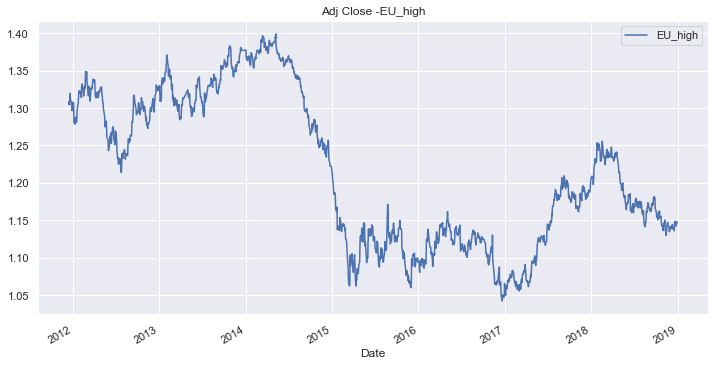

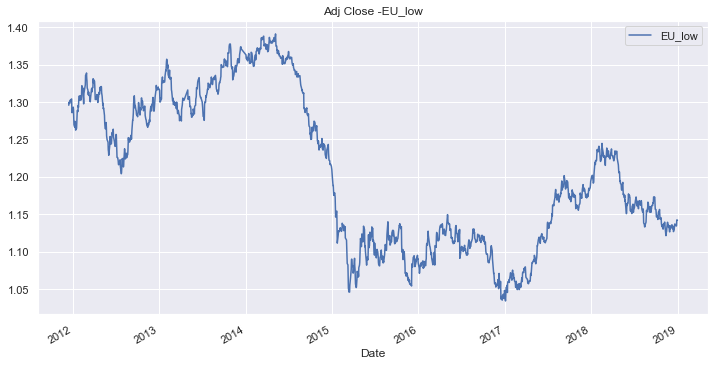

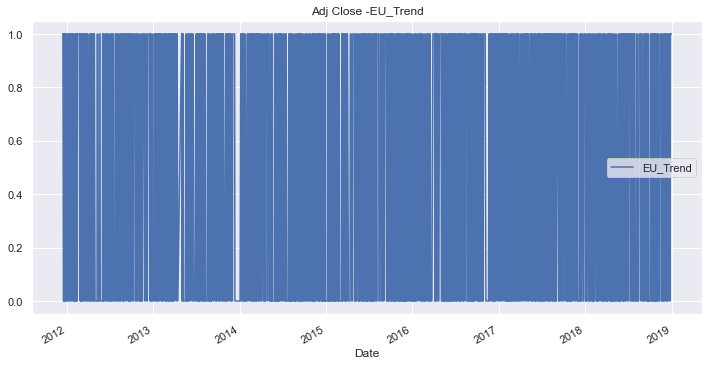

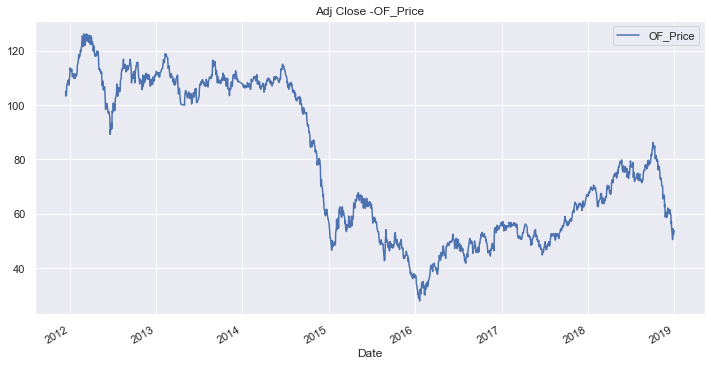

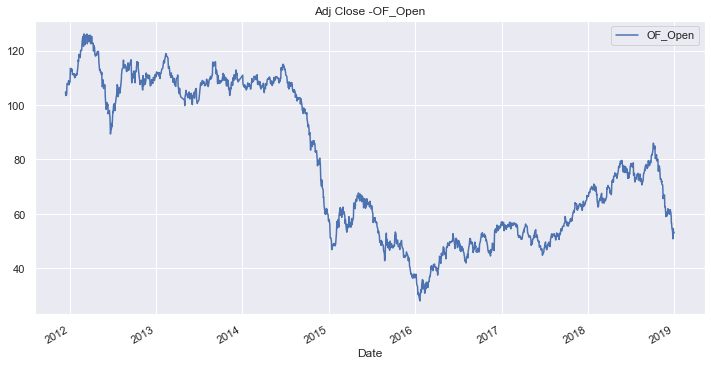

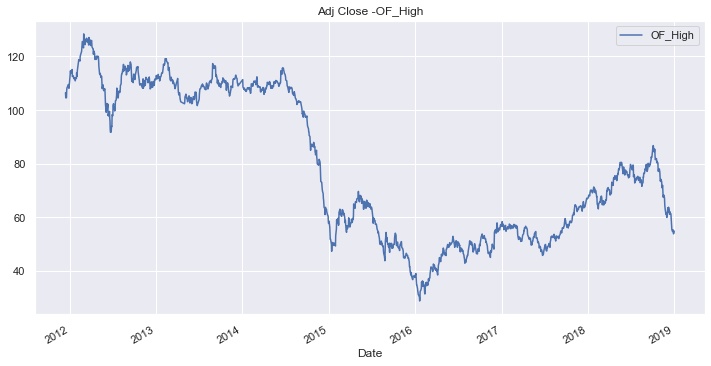

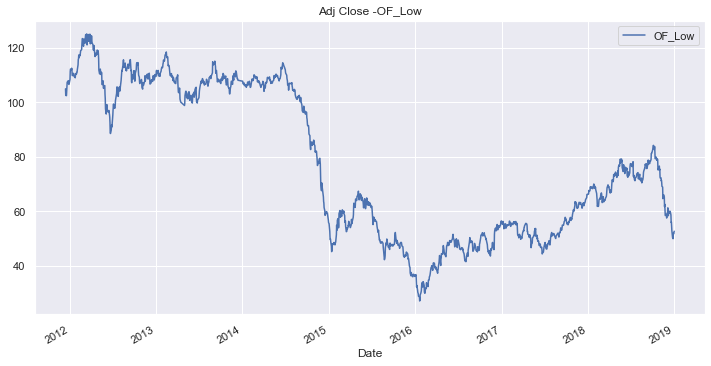

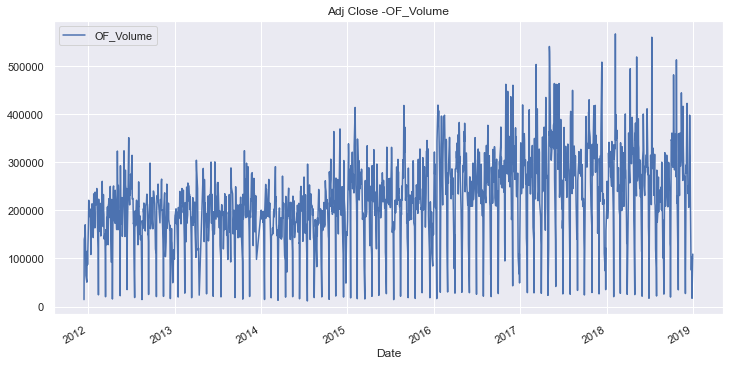

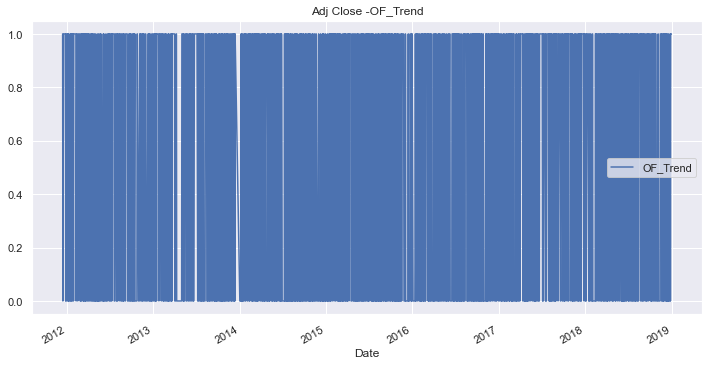

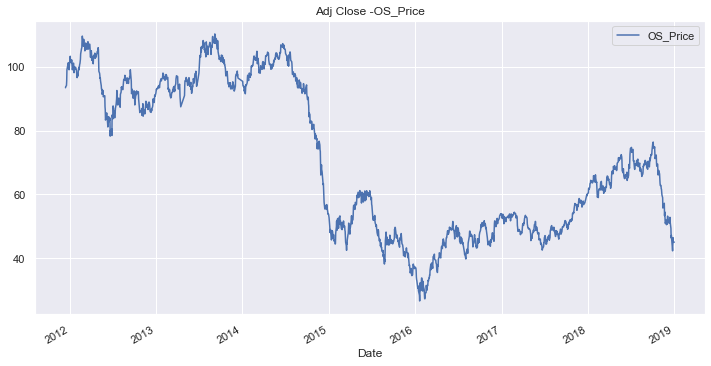

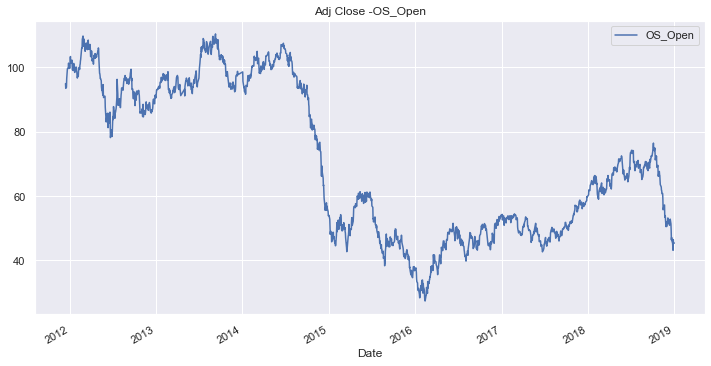

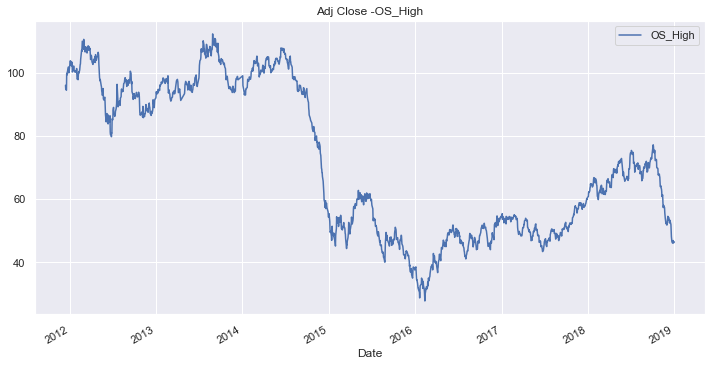

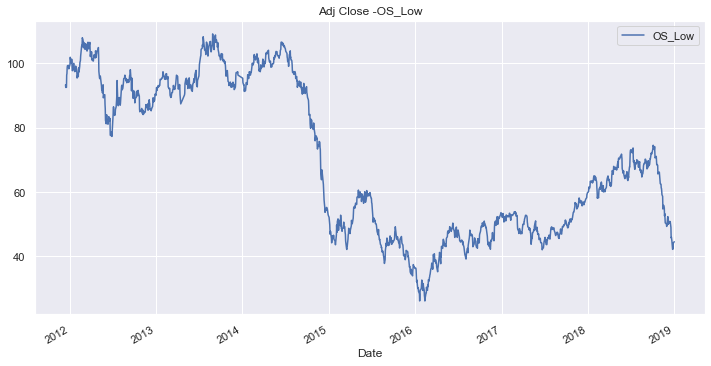

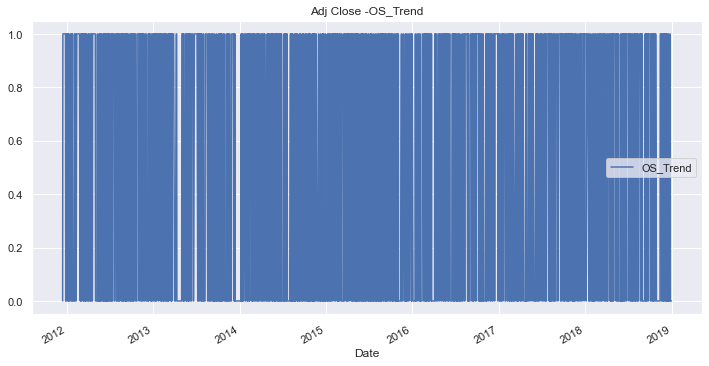

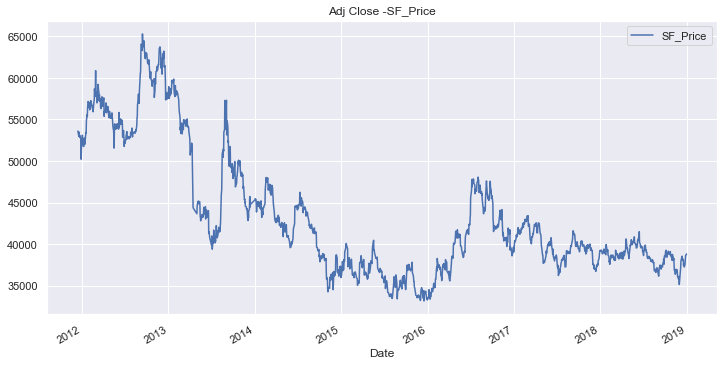

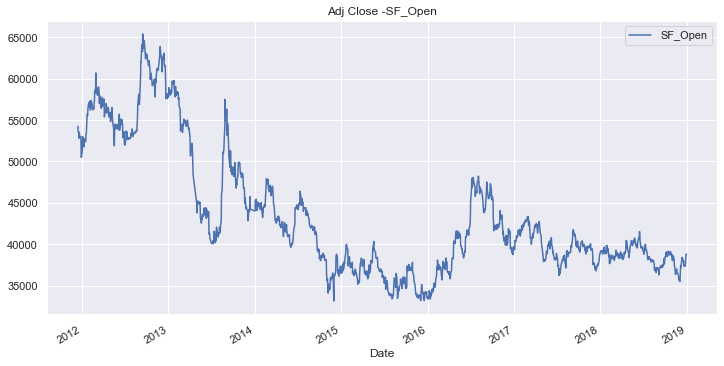

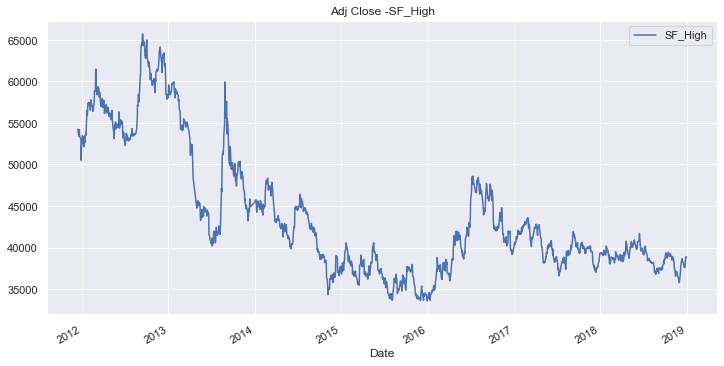

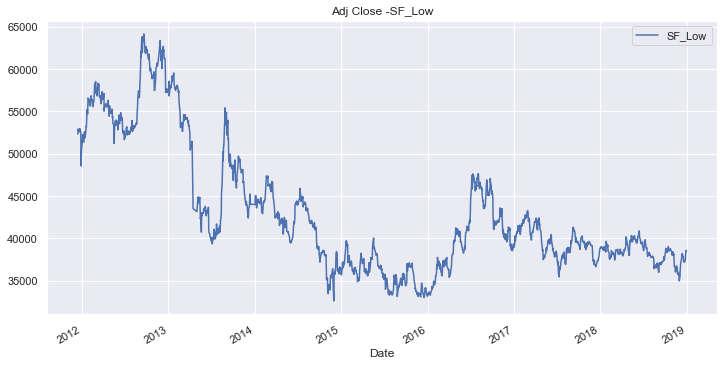

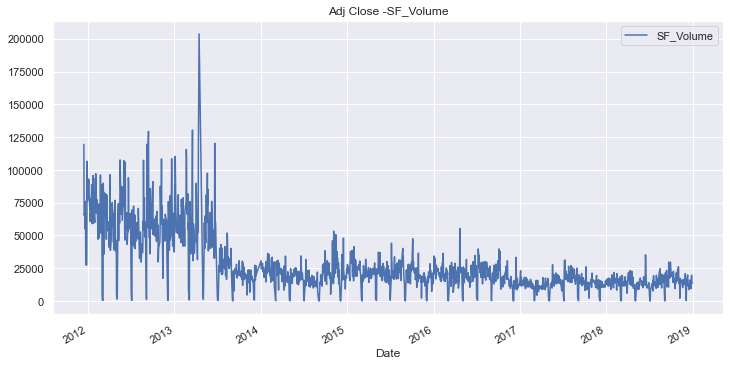

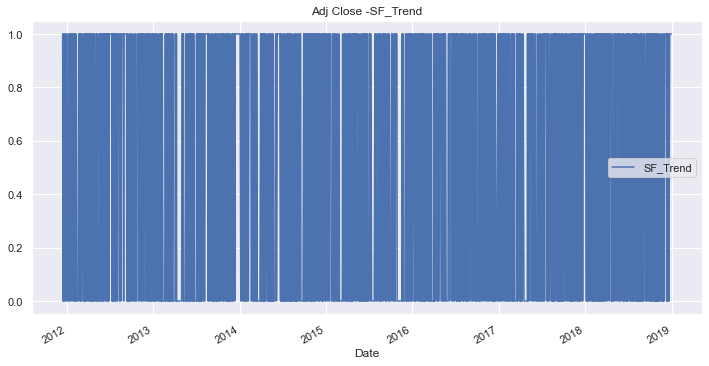

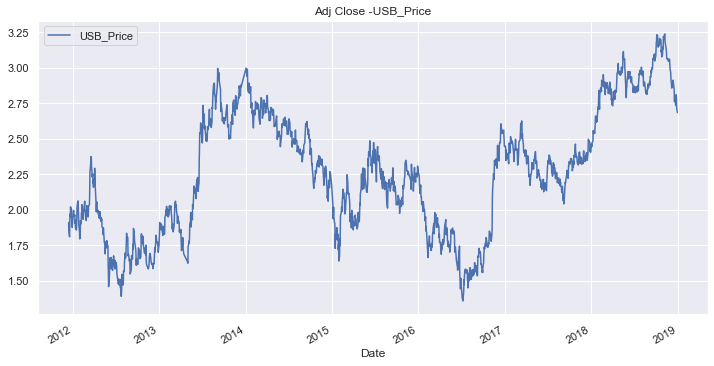

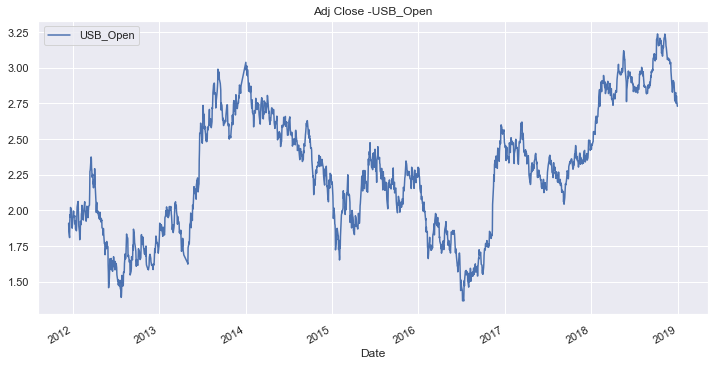

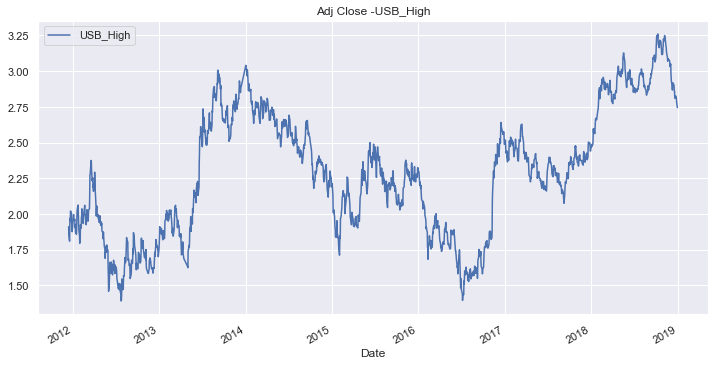

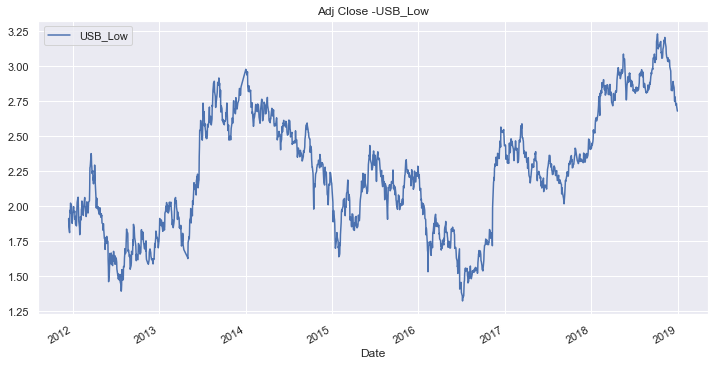

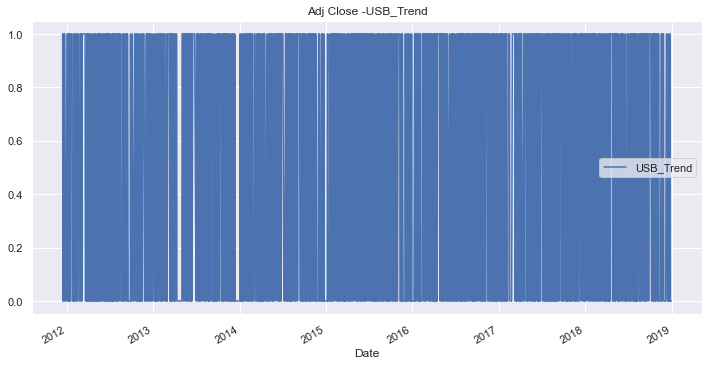

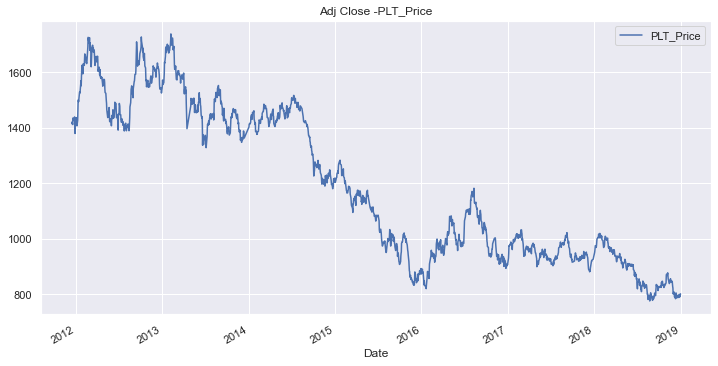

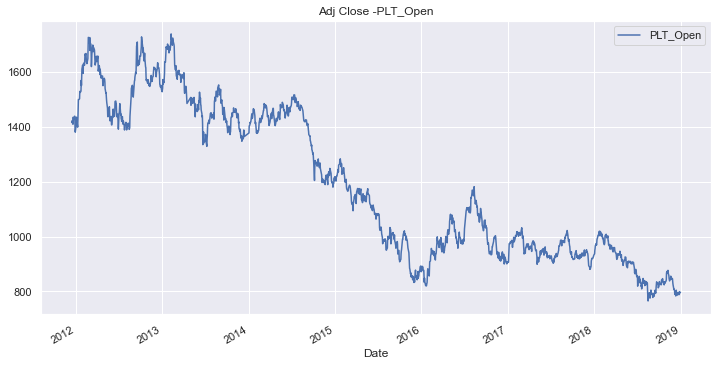

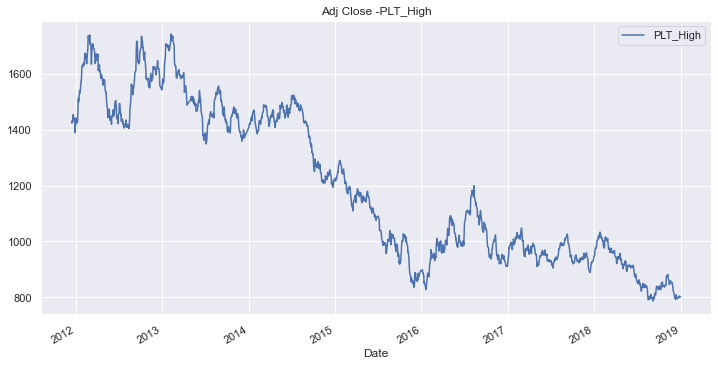

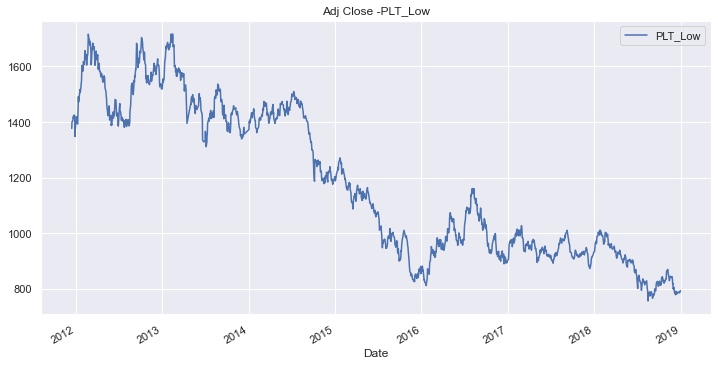

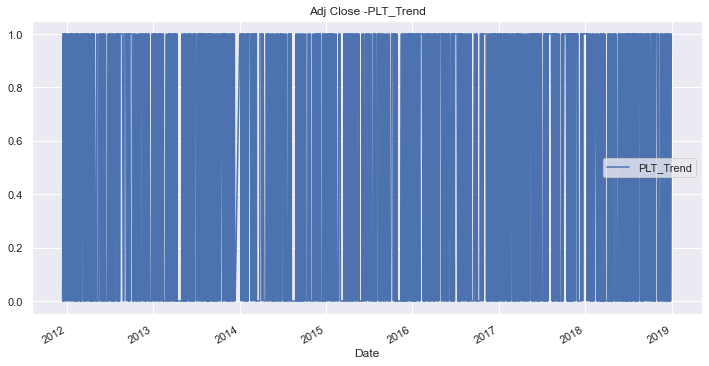

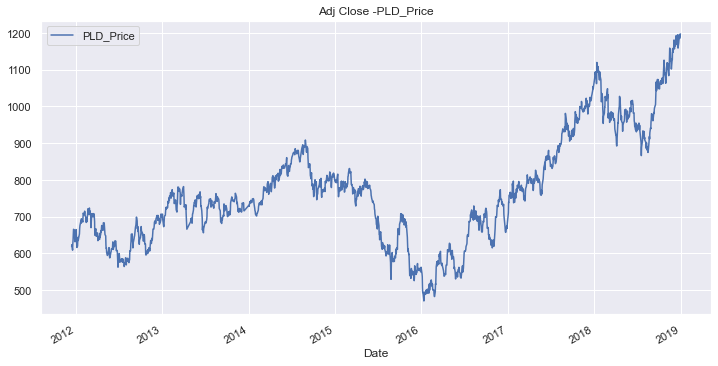

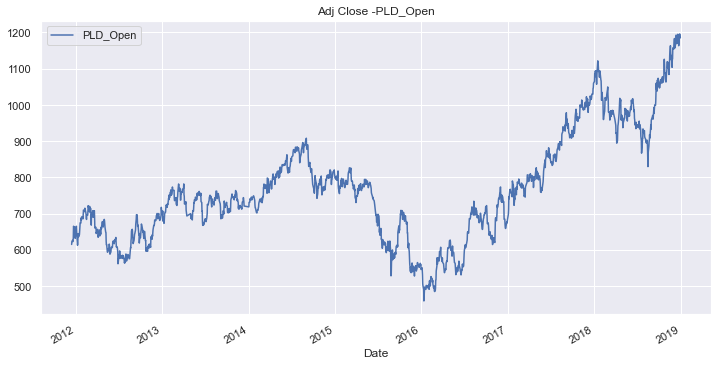

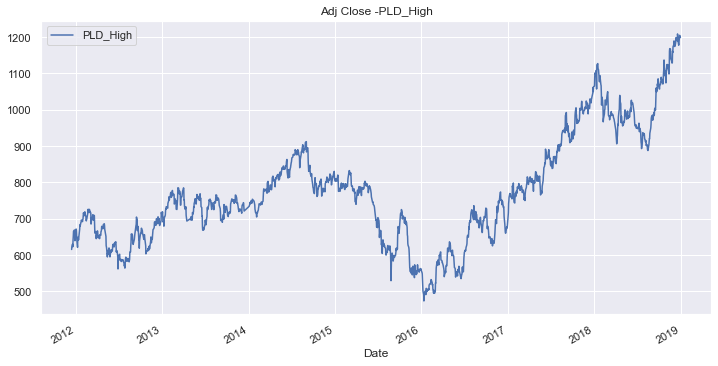

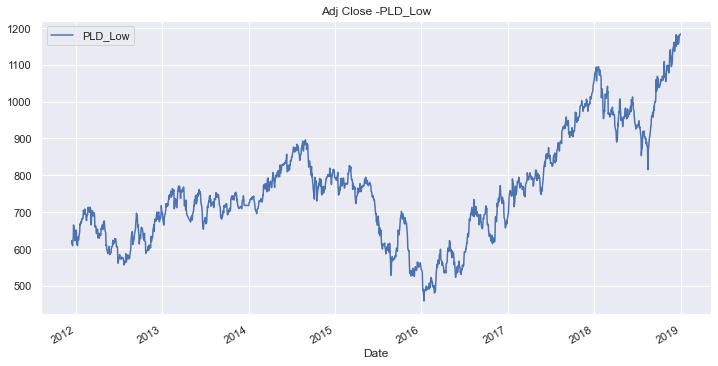

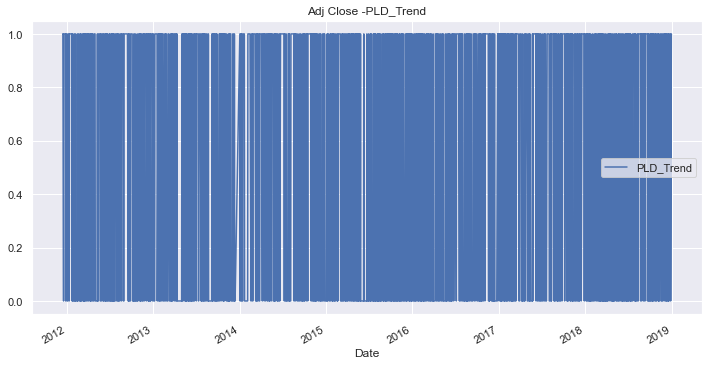

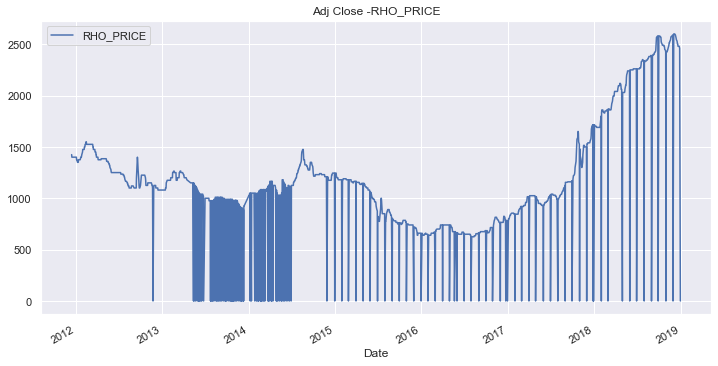

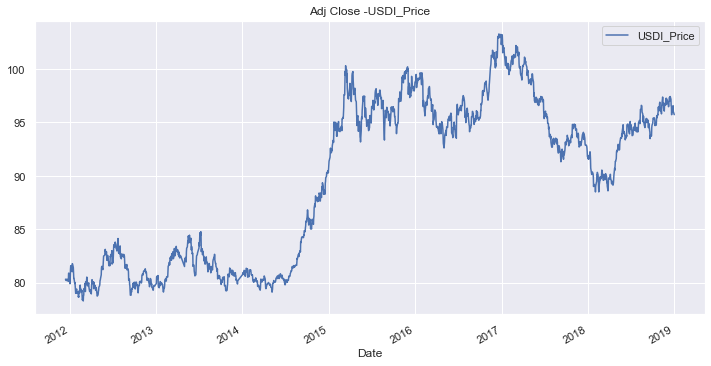

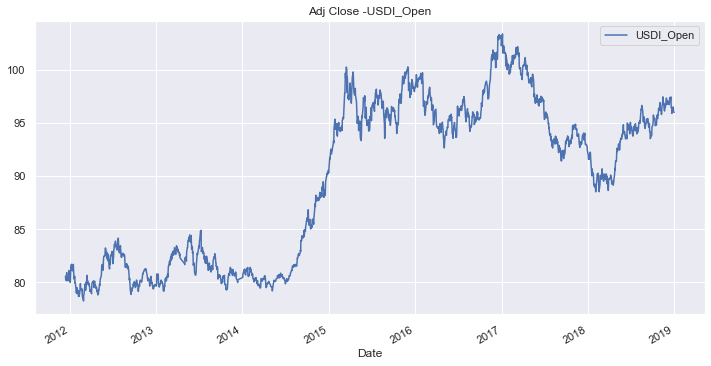

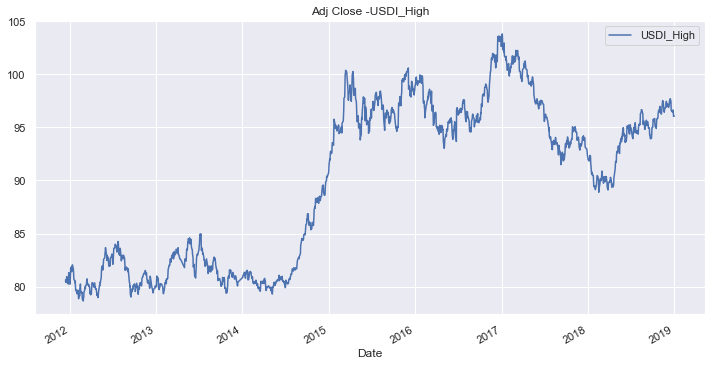

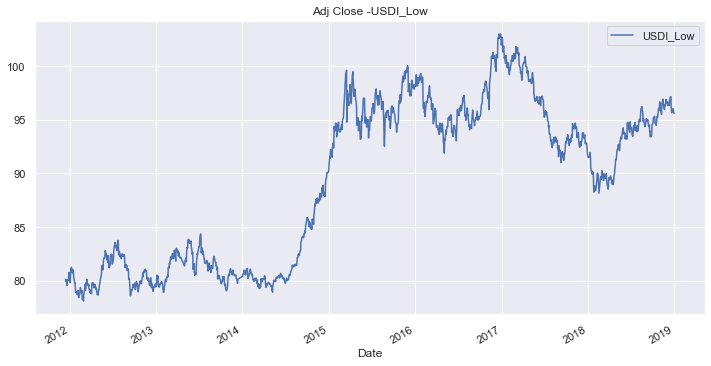

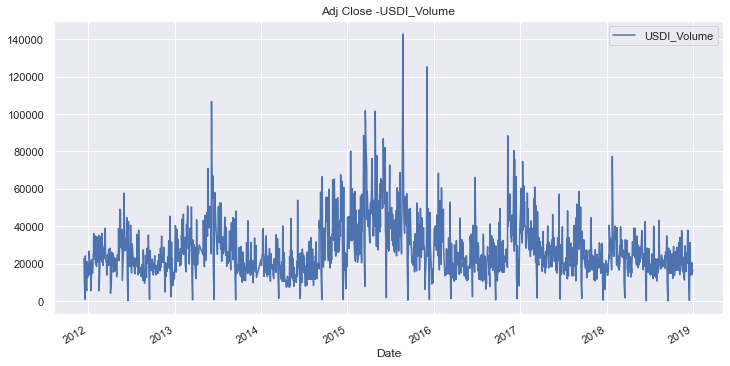

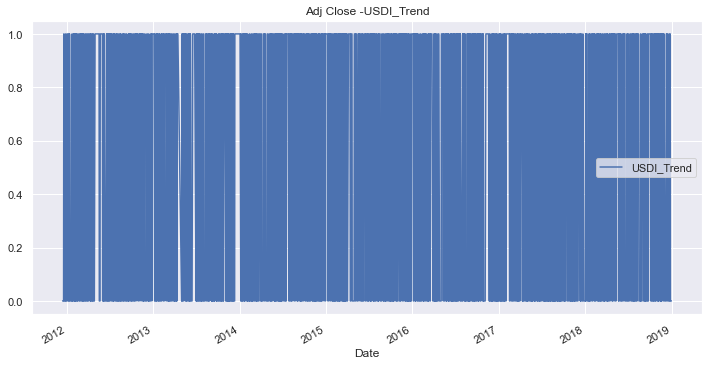

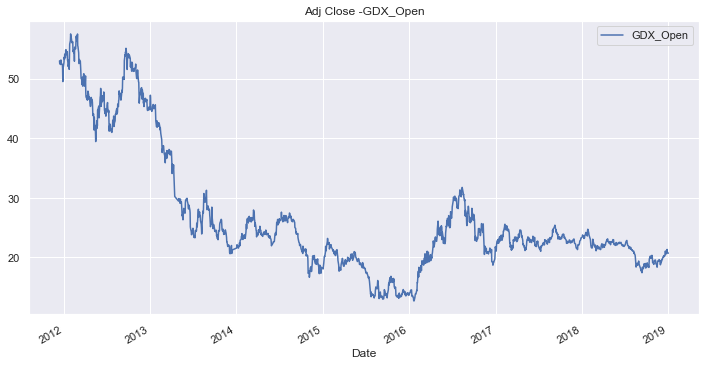

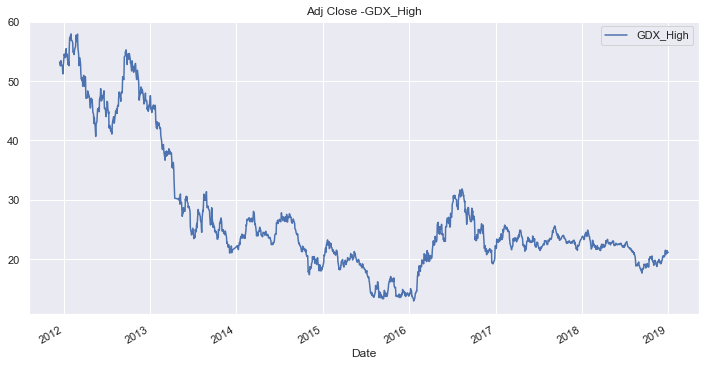

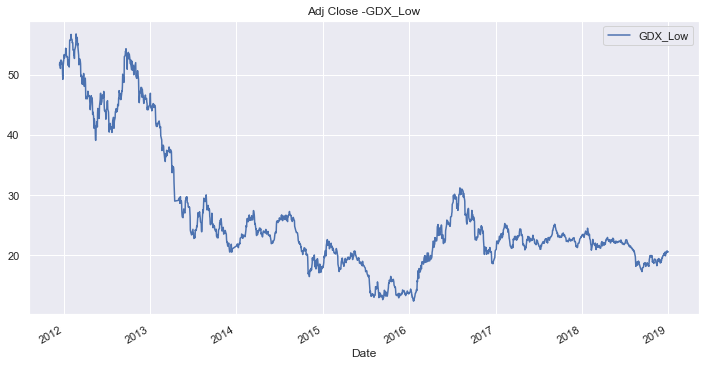

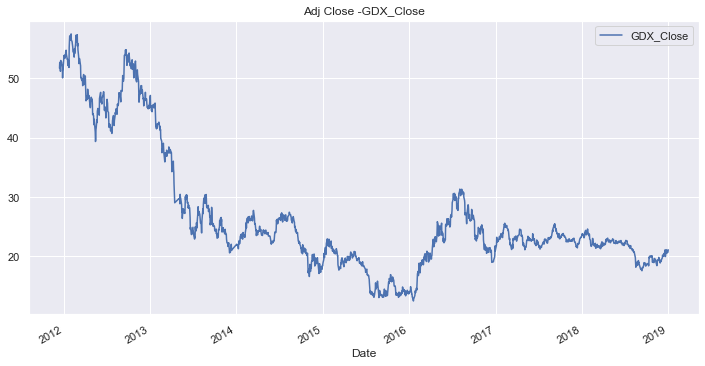

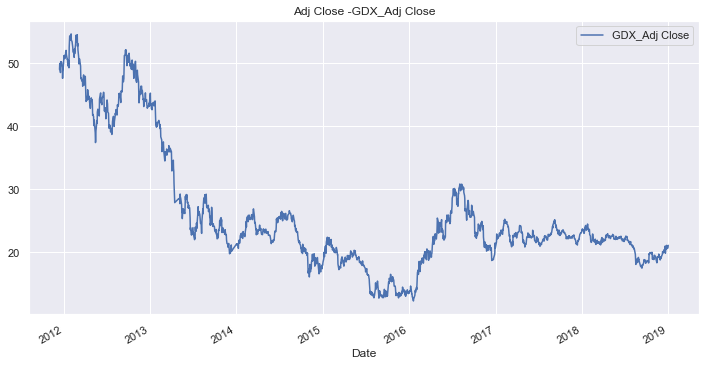

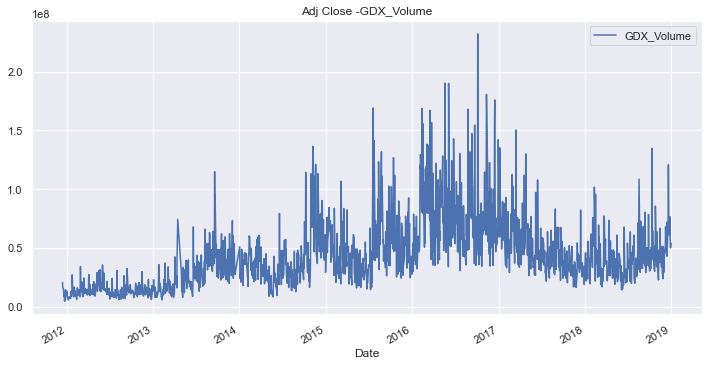

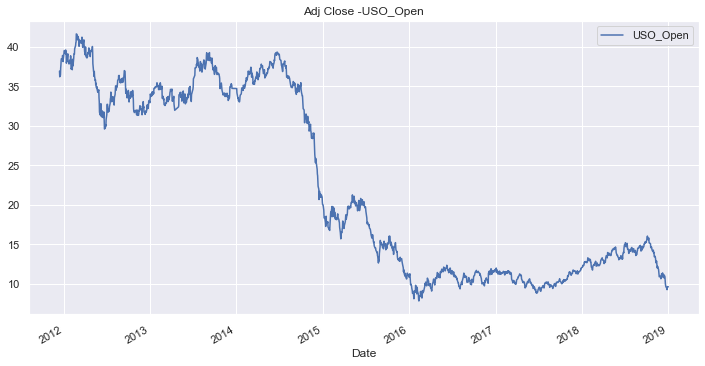

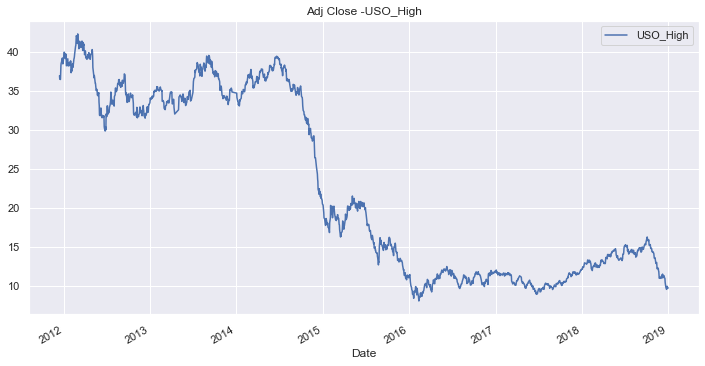

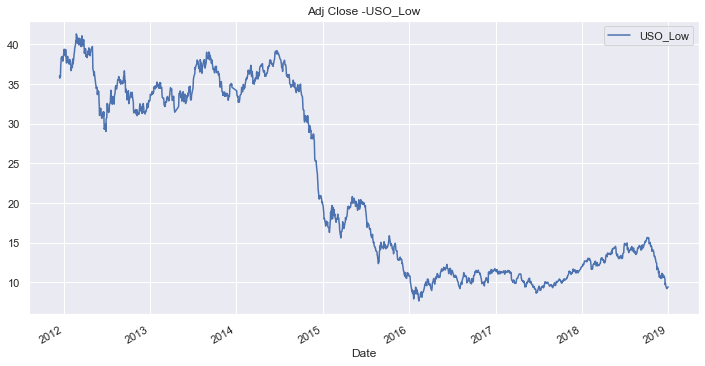

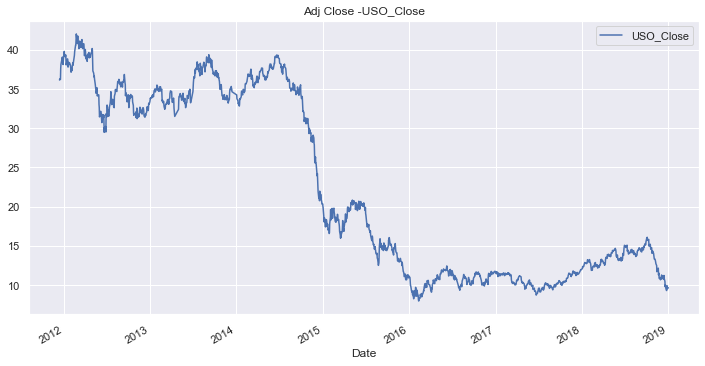

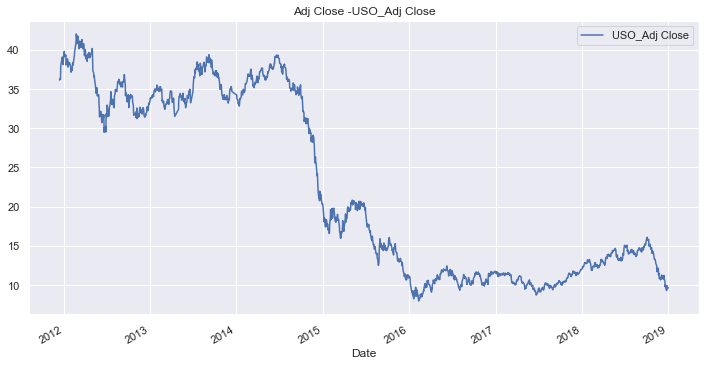

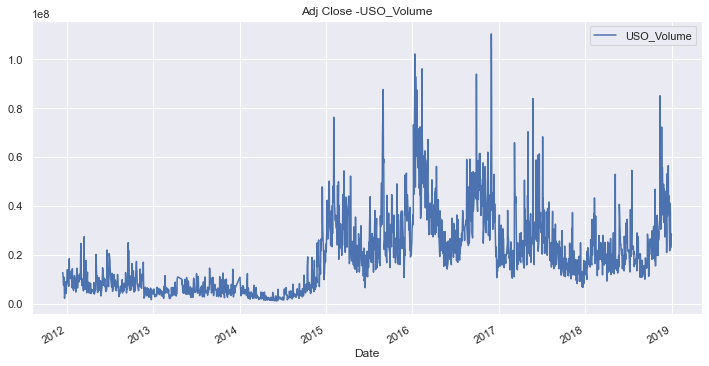

In [61]:
for col in d.columns:
    plt.figure(figsize=(12,6))
    #df['Adj Close'].plot()
    d[col].plot()
    plt.title(f'Adj Close -{col}')
    plt.legend()
    plt.show()

- Affichage de la matrice de correlation

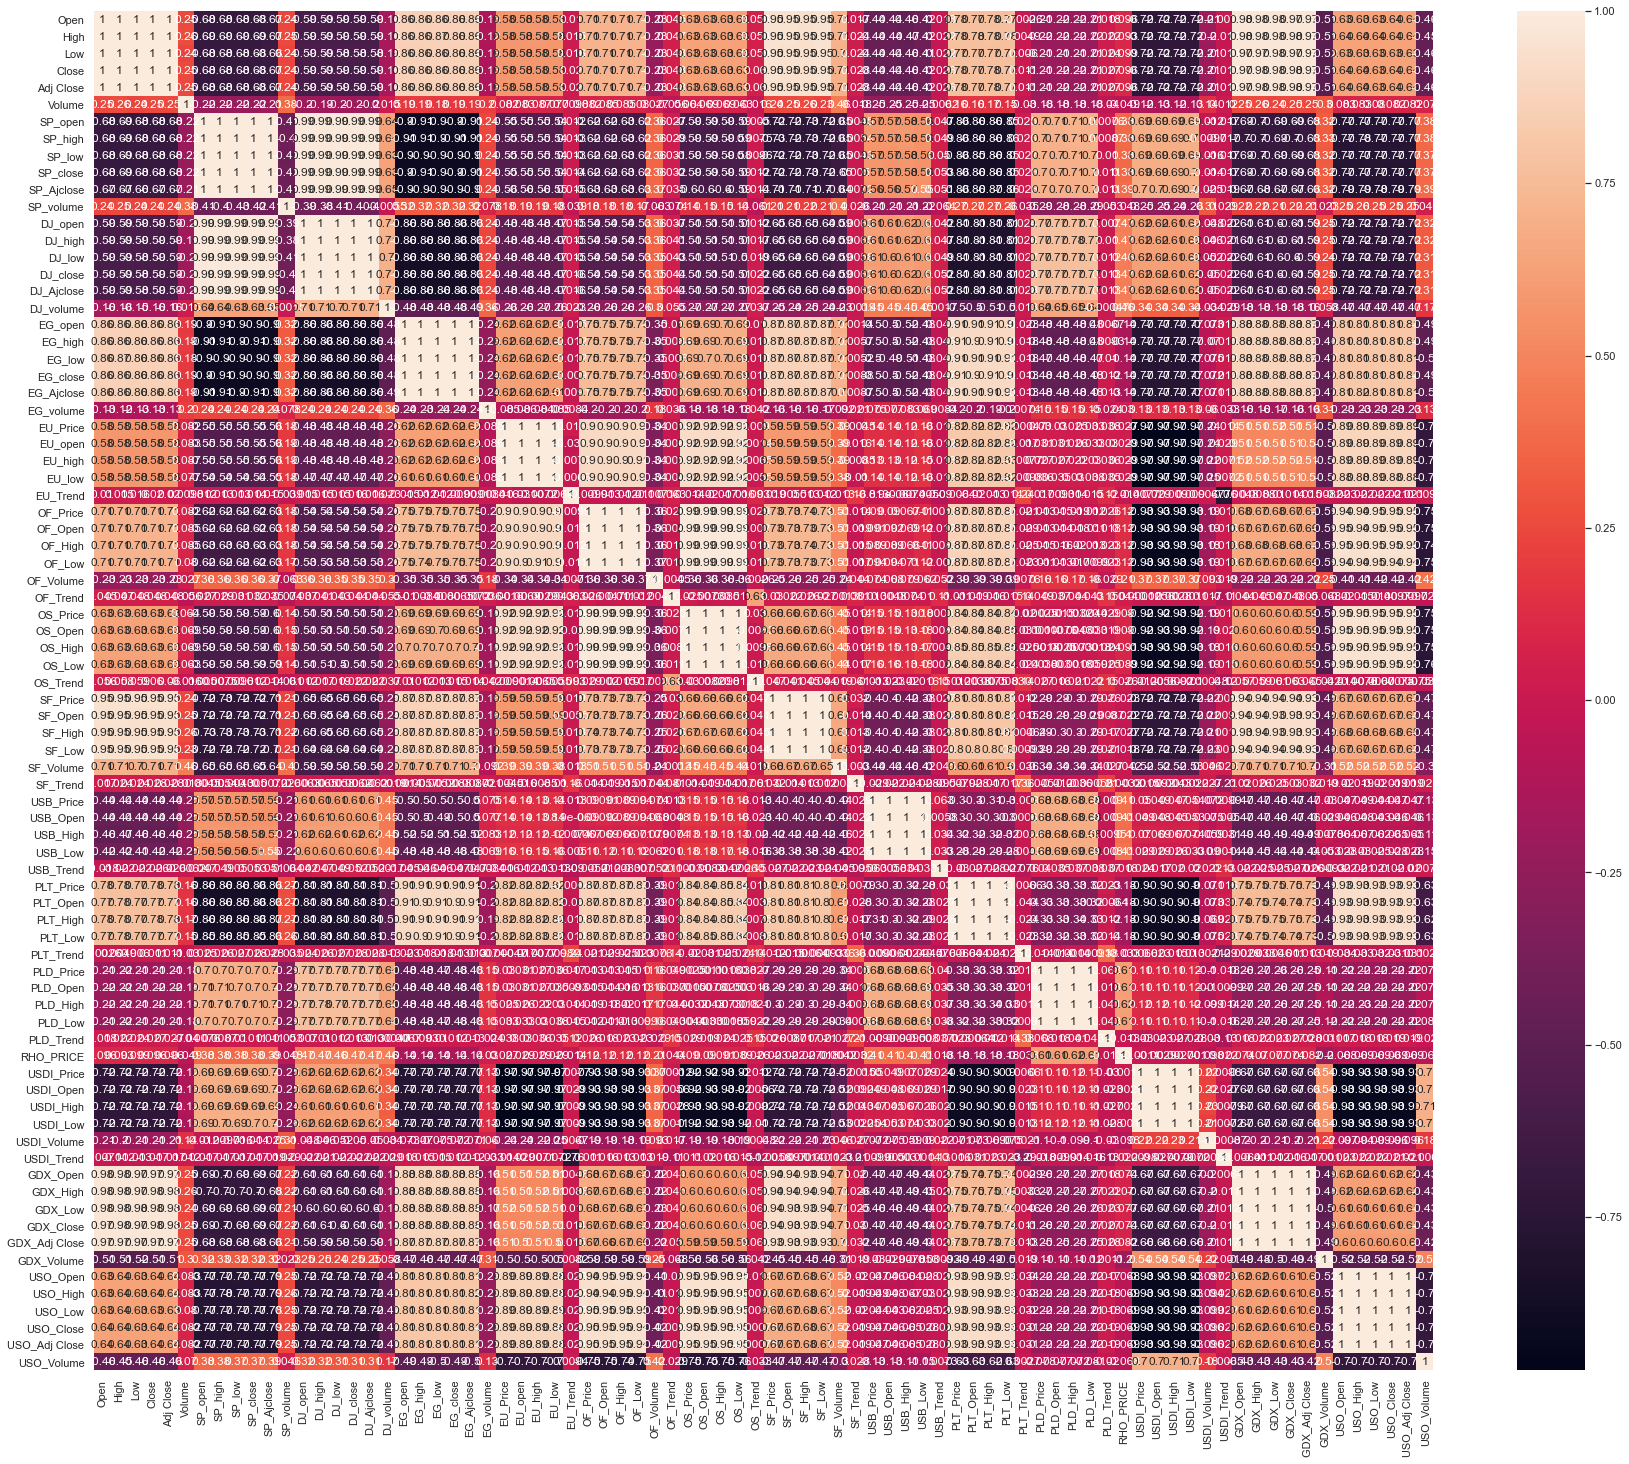

In [32]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(), annot=True)
plt.show()
#fig = px.imshow(df.corr())
#fig.show()

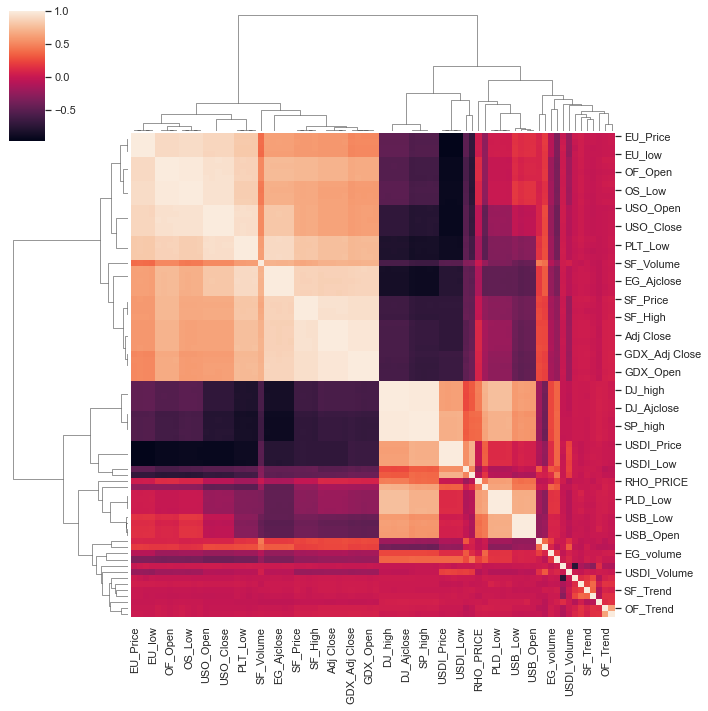

In [46]:
sns.clustermap(df.corr())
plt.show()

In [55]:
X = df.drop(['Adj Close'], axis=1)

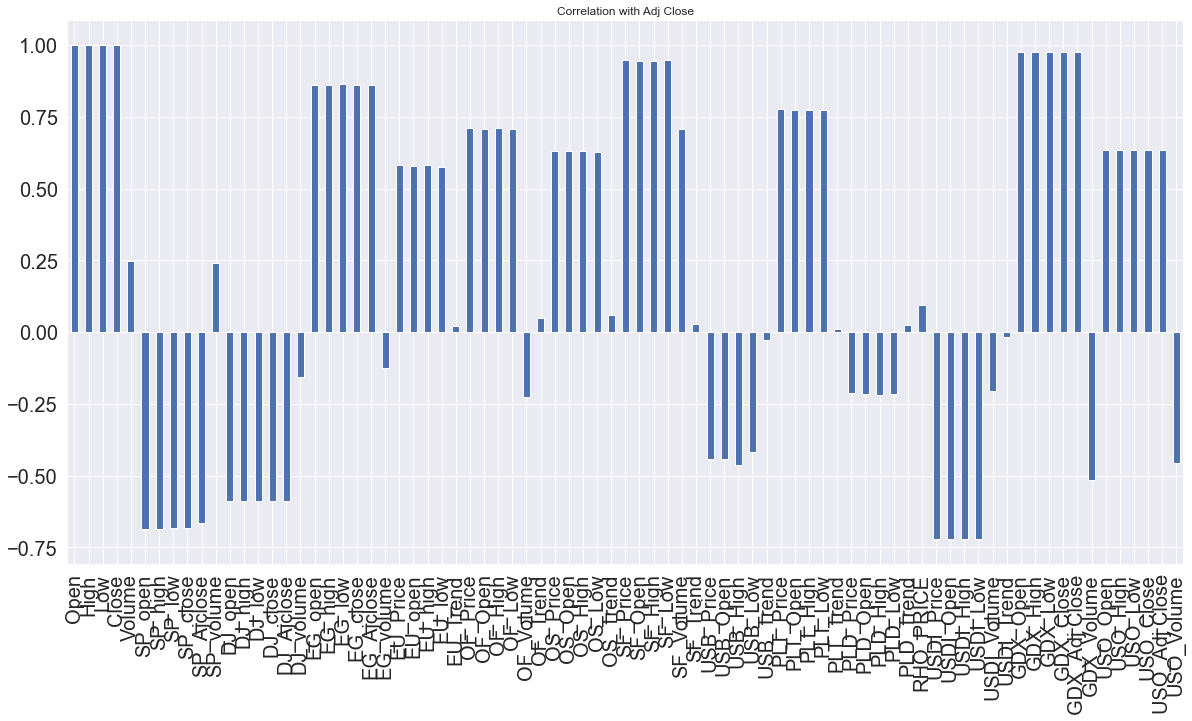

In [58]:
X.corrwith(df['Adj Close']).plot.bar(figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20, rot = 90, grid = True)
plt.show()

* Calcule du coeficient de Correlation

In [60]:
corr_matrix = df.corr()
coef = corr_matrix['Adj Close'].sort_values(ascending = False)

* Variable positivement corrélé avec la variable cible

In [61]:
pos_corr = coef[coef>0]
pos_corr

Close            1.000000
Adj Close        1.000000
High             0.999535
Low              0.999532
Open             0.998976
GDX_Low          0.975561
GDX_Close        0.975459
GDX_High         0.975255
GDX_Adj Close    0.974980
GDX_Open         0.974824
SF_Low           0.947842
SF_Price         0.947420
SF_Open          0.945557
SF_High          0.945203
EG_low           0.863917
EG_open          0.862900
EG_close         0.862770
EG_high          0.861479
EG_Ajclose       0.859850
PLT_Price        0.775861
PLT_High         0.775481
PLT_Low          0.773993
PLT_Open         0.773760
OF_High          0.711334
OF_Price         0.710693
OF_Open          0.709096
OF_Low           0.708266
SF_Volume        0.706505
USO_Adj Close    0.635675
USO_Close        0.635675
USO_High         0.635311
USO_Open         0.635197
USO_Low          0.634732
OS_High          0.632001
OS_Price         0.630817
OS_Open          0.630046
OS_Low           0.629083
EU_high          0.582969
EU_Price    

In [78]:
neg_corr = coef[coef<0]
neg_corr

USDI_Trend    -0.016641
USB_Trend     -0.025933
EG_volume     -0.126586
DJ_volume     -0.155526
USDI_Volume   -0.205954
PLD_Price     -0.213179
PLD_Low       -0.214919
PLD_Open      -0.216426
PLD_High      -0.217490
OF_Volume     -0.225436
USB_Low       -0.417352
USB_Open      -0.440822
USB_Price     -0.441347
USO_Volume    -0.456193
USB_High      -0.464116
GDX_Volume    -0.514616
DJ_low        -0.588157
DJ_Ajclose    -0.588411
DJ_close      -0.588411
DJ_high       -0.588778
DJ_open       -0.588800
SP_Ajclose    -0.666071
SP_low        -0.683750
SP_close      -0.684284
SP_open       -0.684618
SP_high       -0.684904
USDI_High     -0.720023
USDI_Open     -0.720140
USDI_Price    -0.721569
USDI_Low      -0.722078
Name: Adj Close, dtype: float64

* Determination des outliers

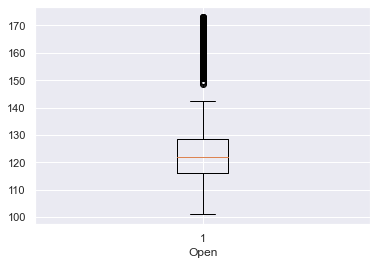

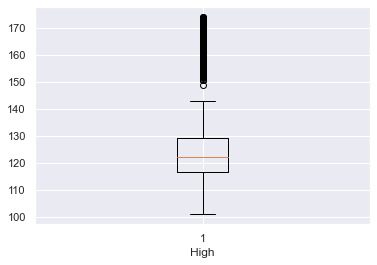

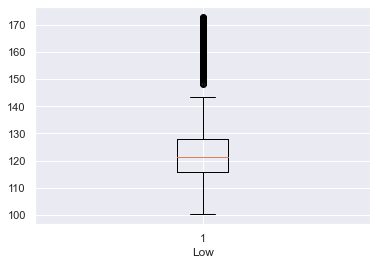

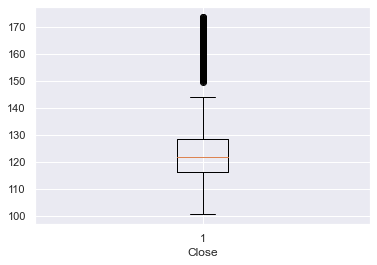

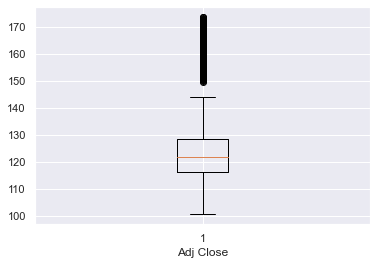

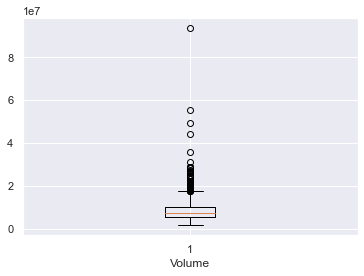

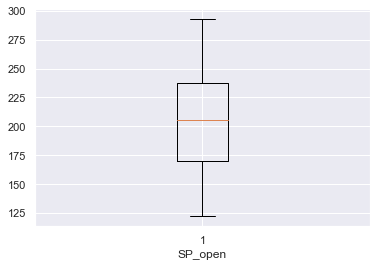

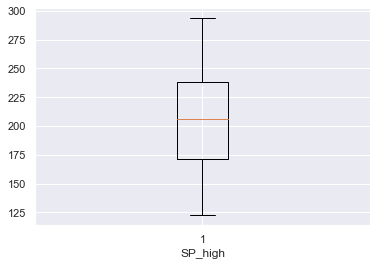

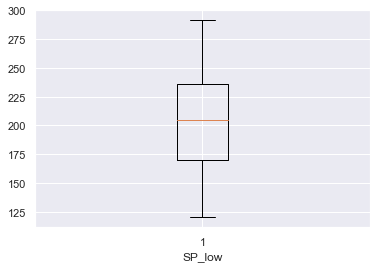

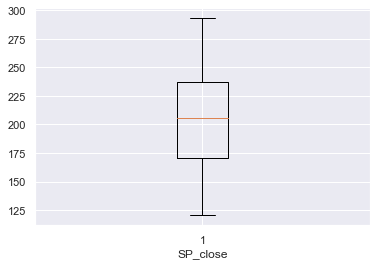

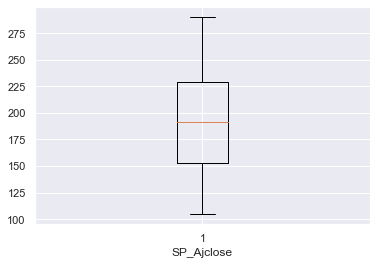

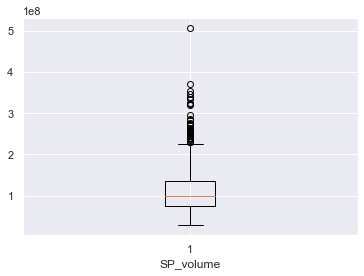

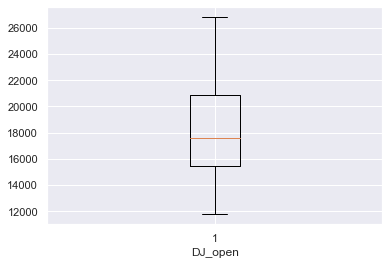

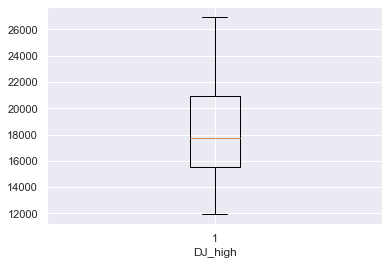

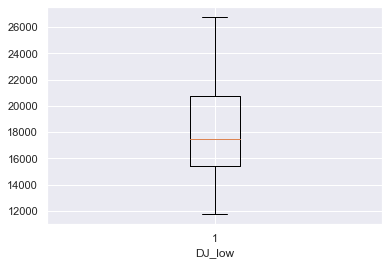

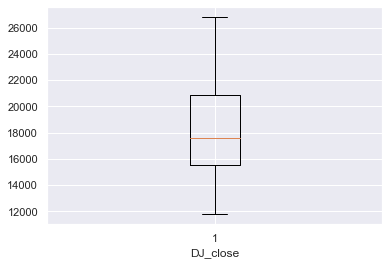

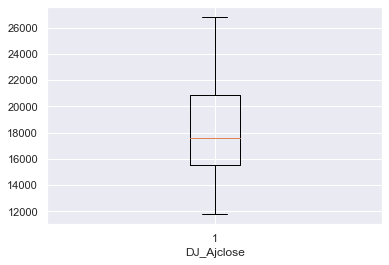

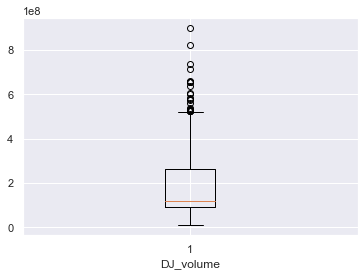

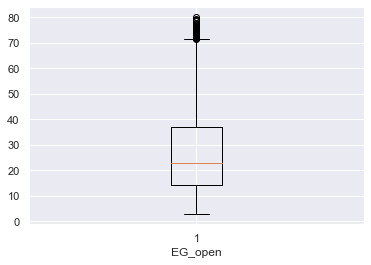

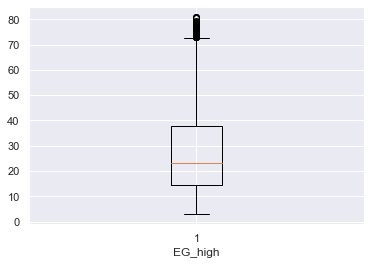

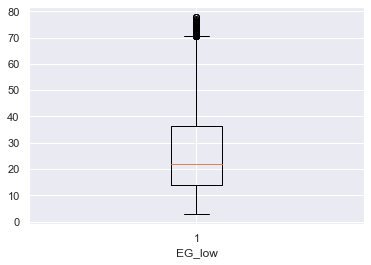

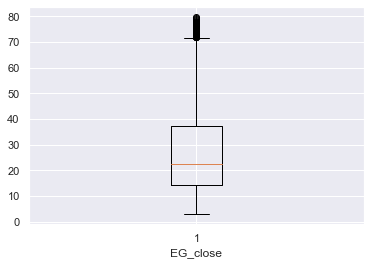

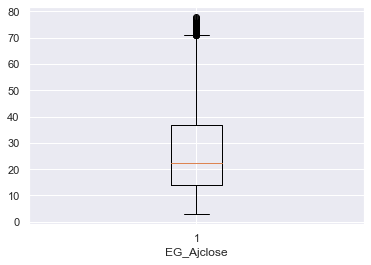

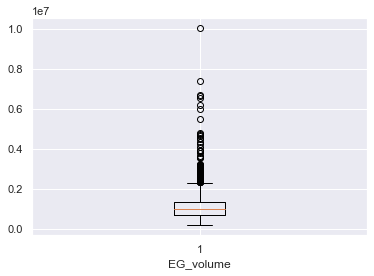

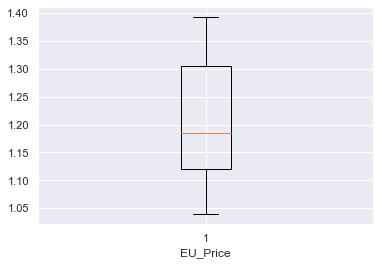

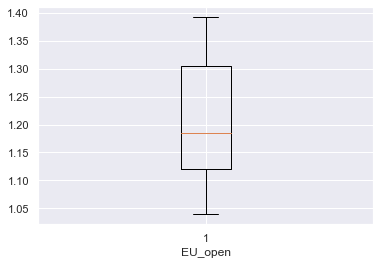

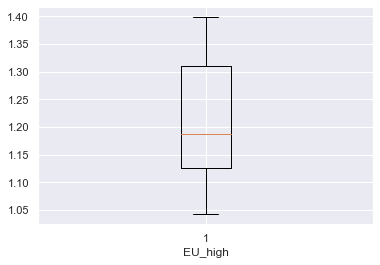

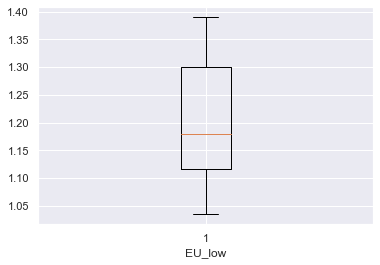

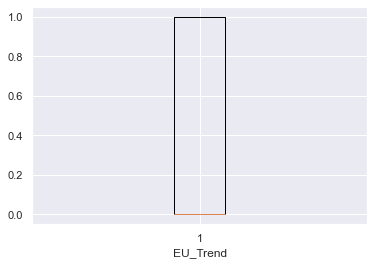

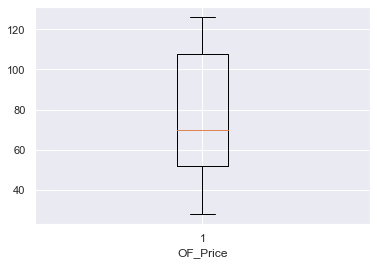

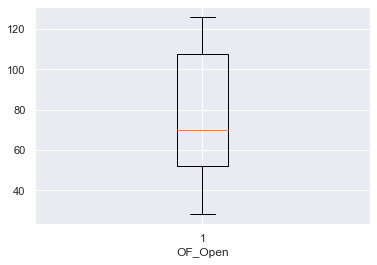

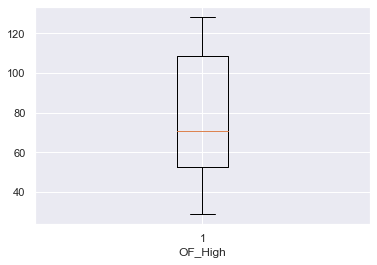

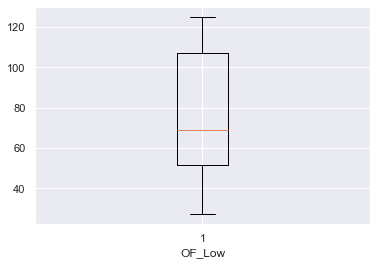

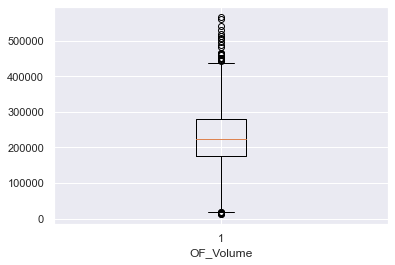

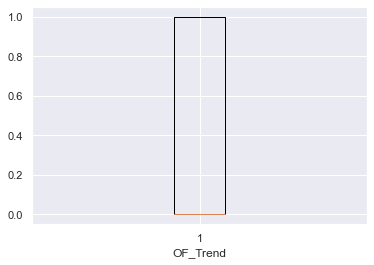

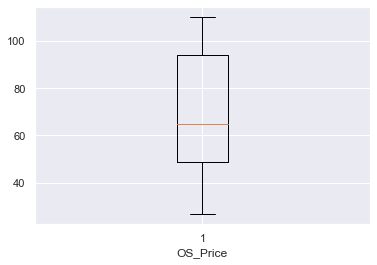

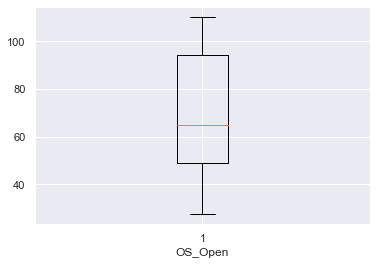

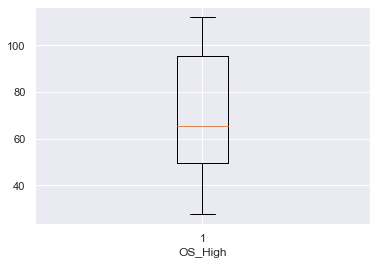

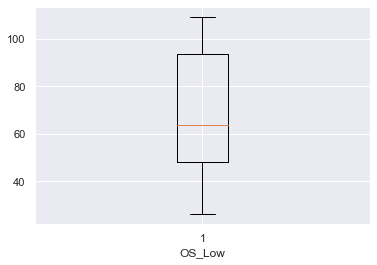

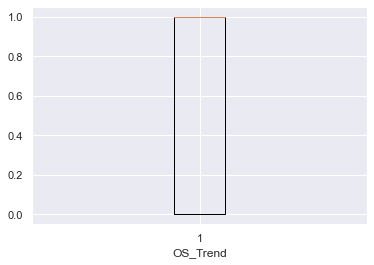

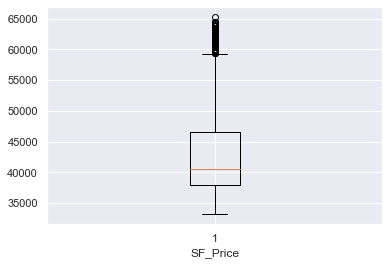

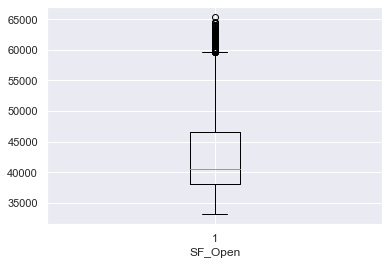

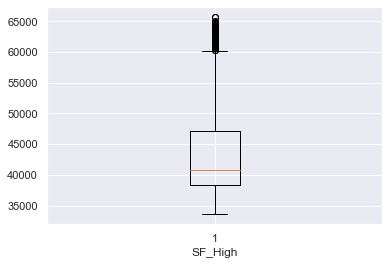

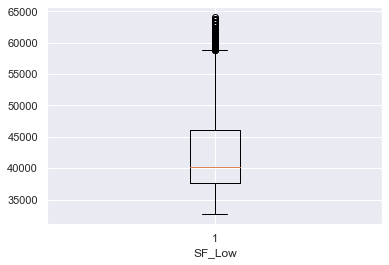

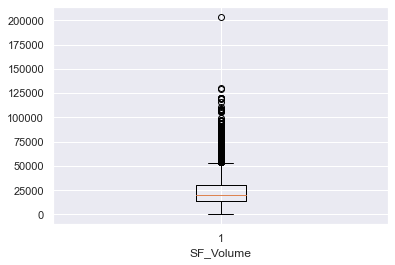

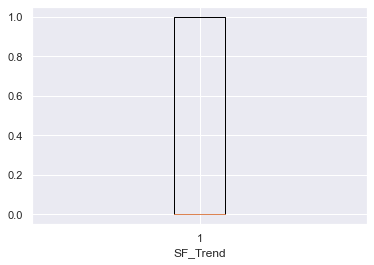

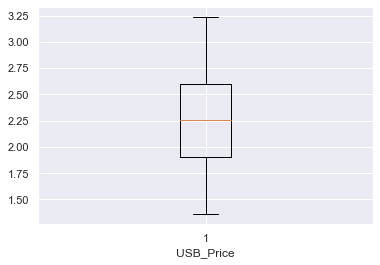

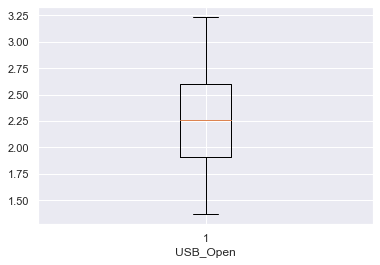

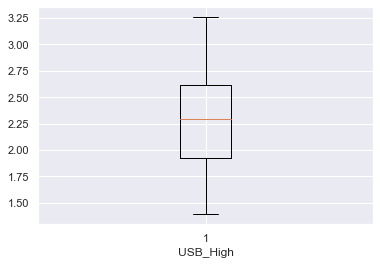

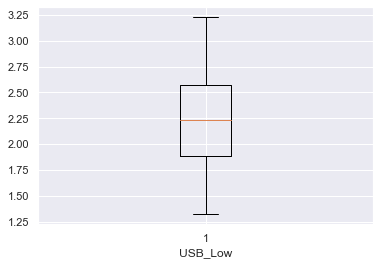

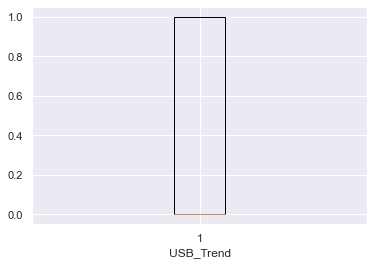

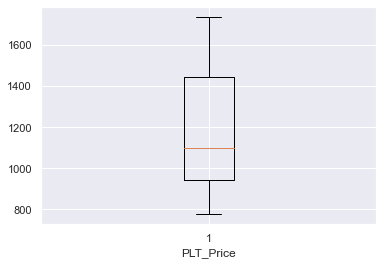

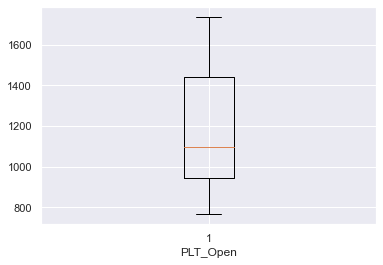

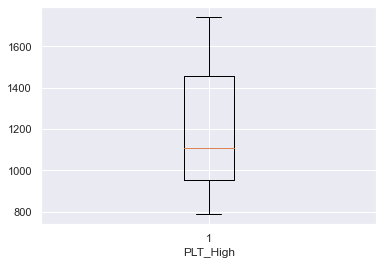

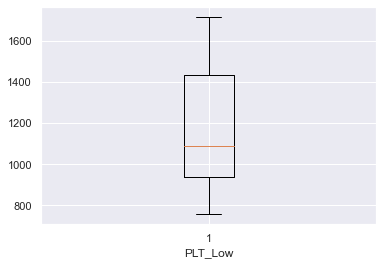

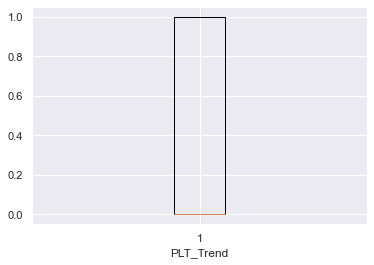

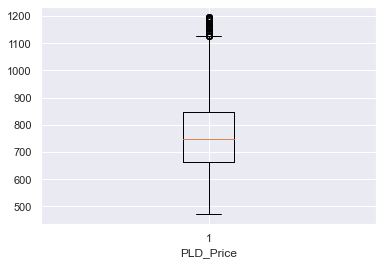

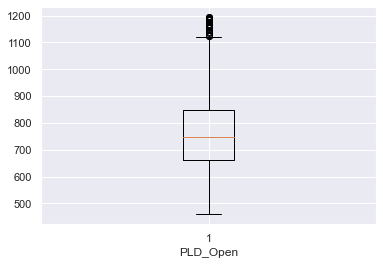

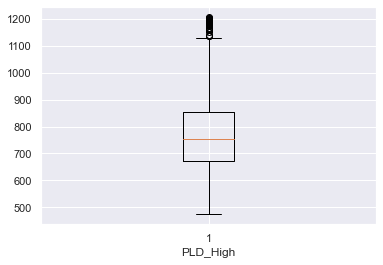

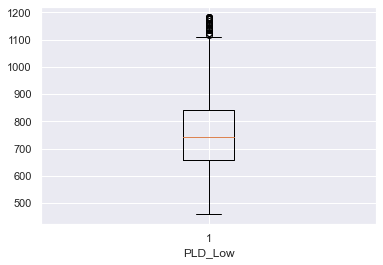

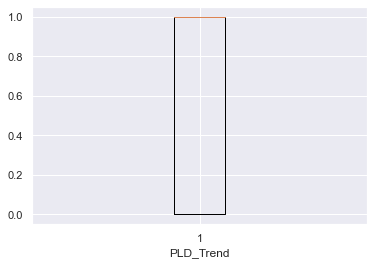

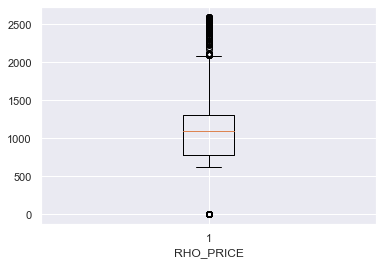

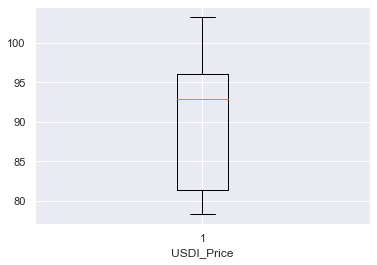

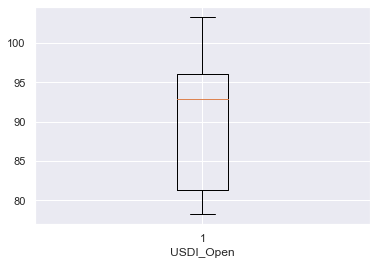

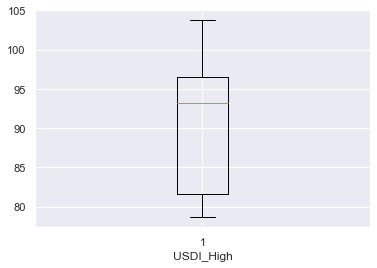

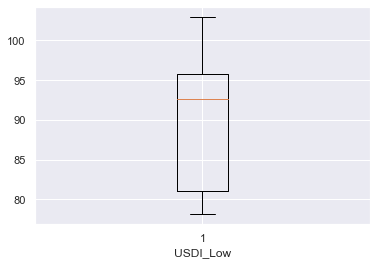

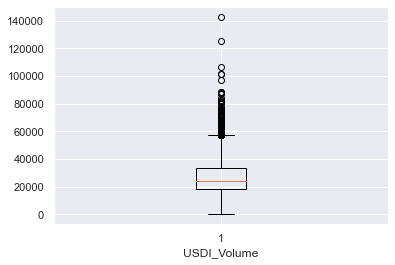

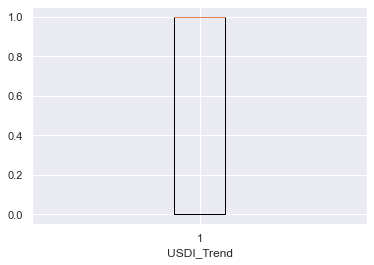

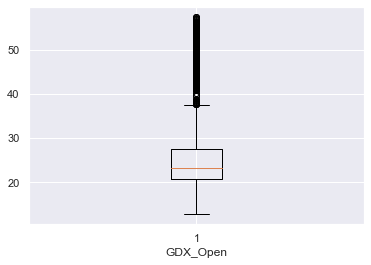

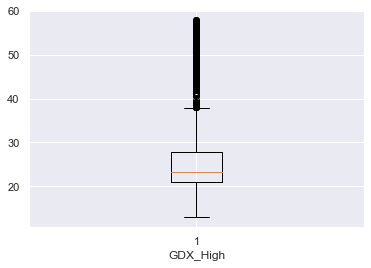

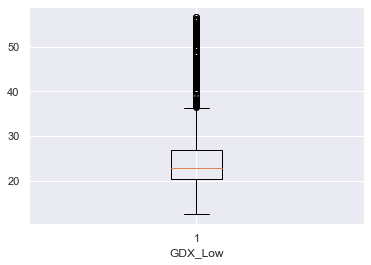

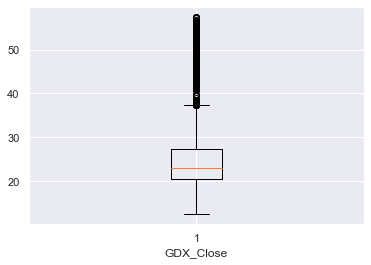

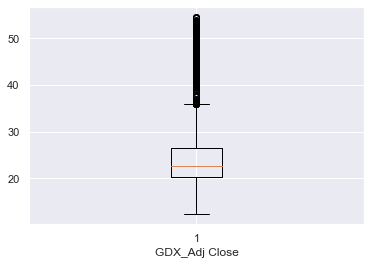

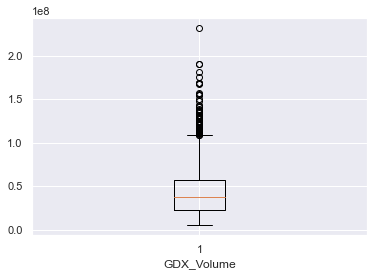

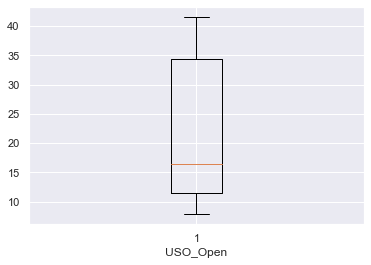

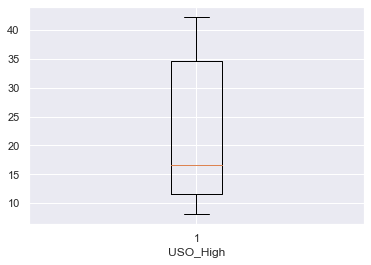

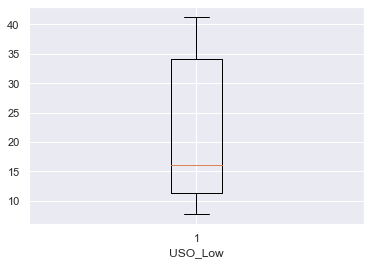

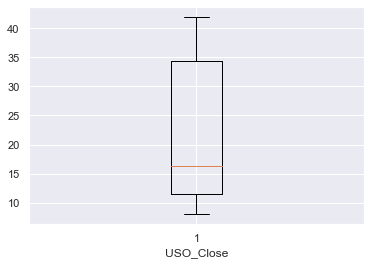

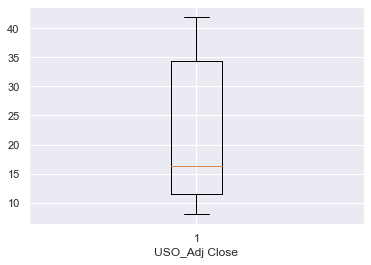

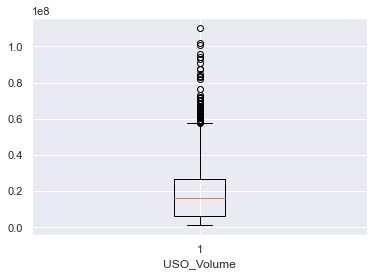

In [74]:
for col in df.columns:
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [55]:
outlierCol = ['Open','High','Low','Close','Adj Close','Volume','SP_volume','DJ_volume',
'EG_open','EG_high','EG_low','EG_close','EG_Ajclose','EG_volume','OF_Volume','SF_Price',
'SF_Open','SF_High','SF_Low','SF_Volume','PLD_Price','PLD_Open','PLD_High','PLD_Low',
'RHO_PRICE','USDI_Volume','GDX_Open','GDX_High','GDX_Low','GDX_Close','GDX_Adj Close',
'GDX_Volume','USO_Volume']
len(outlierCol)

33

Le dataset contient 33 colonne avec des données valeurs aberrantes

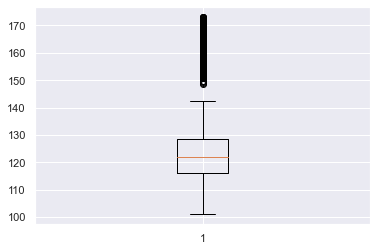

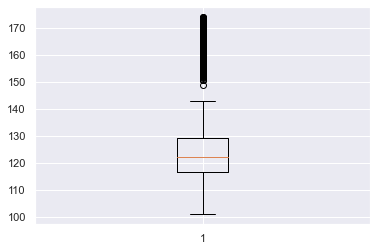

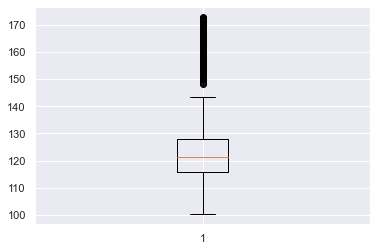

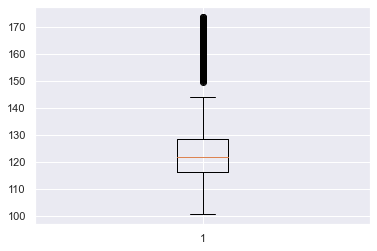

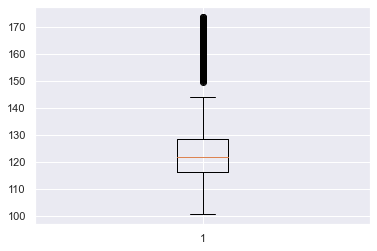

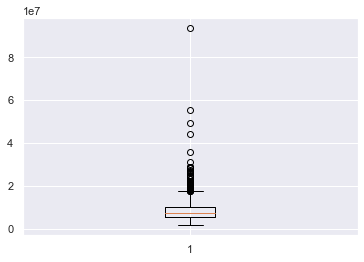

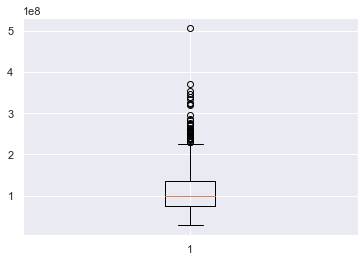

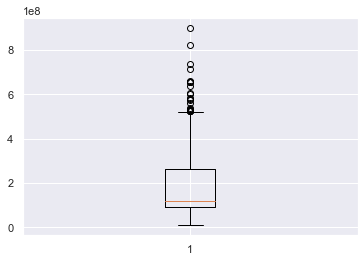

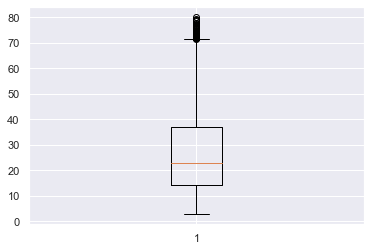

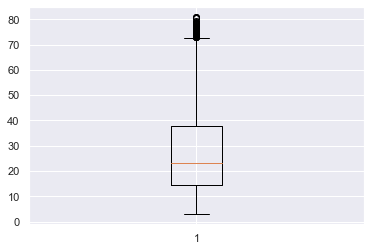

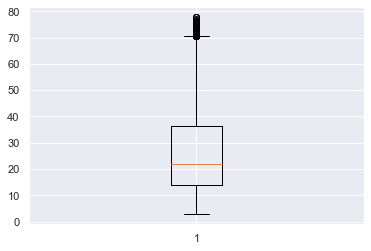

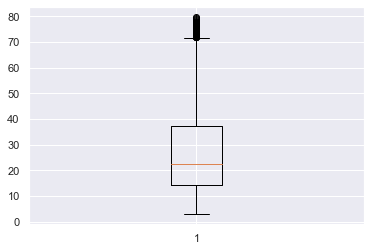

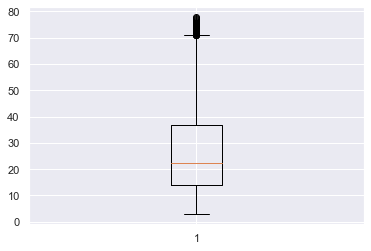

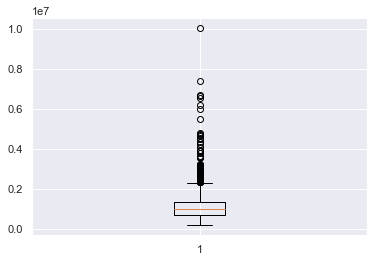

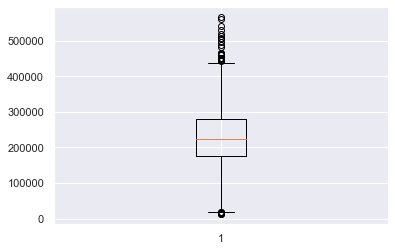

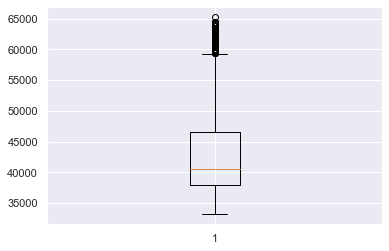

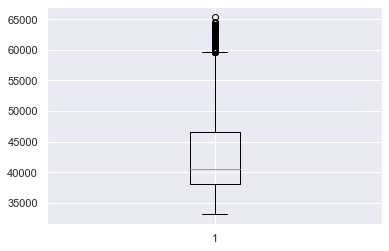

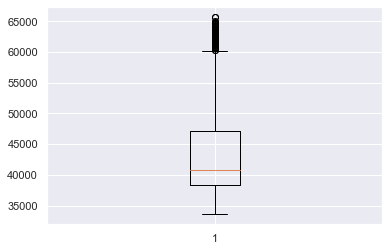

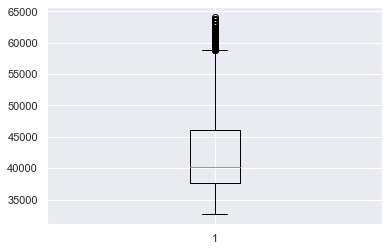

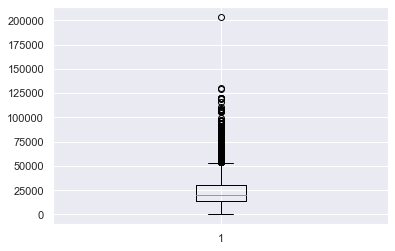

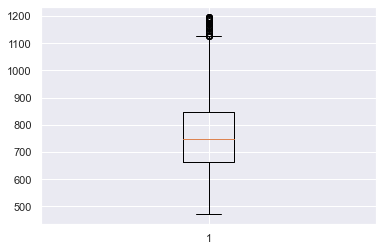

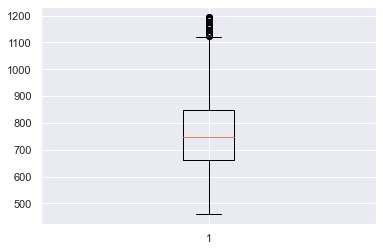

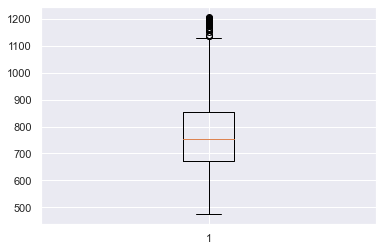

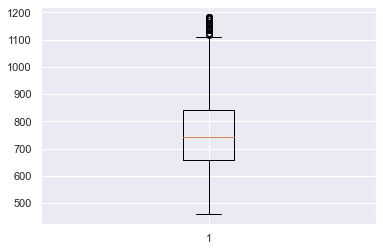

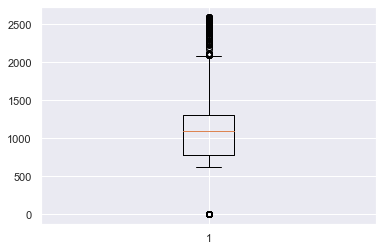

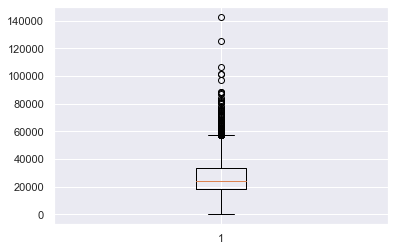

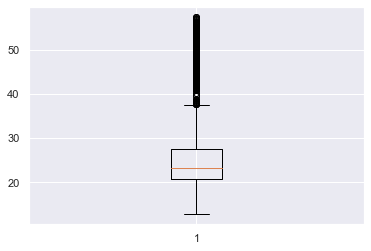

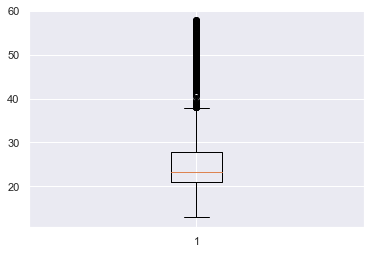

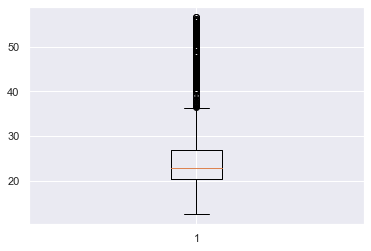

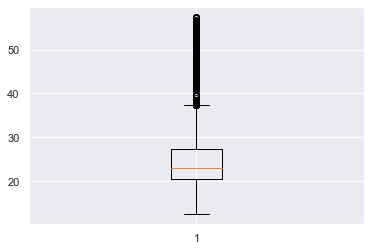

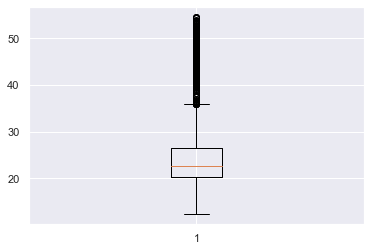

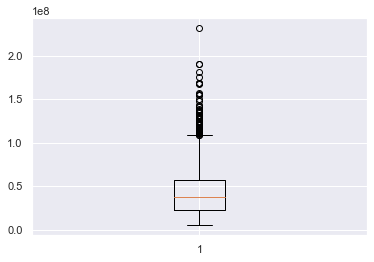

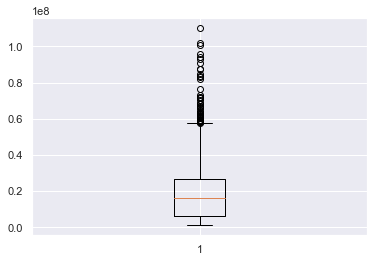

In [57]:
for col in outlierCol:
    plt.boxplot(df[col])
    plt.show()